# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
from matplotlib import gridspec
from geopy.geocoders import Nominatim
import sys
import ipywidgets as widgets
import pandas as pd
from matplotlib import gridspec
from matplotlib import pyplot as plt
from ipywidgets import fixed

/home/felipe/anaconda3/envs/pdsdev_env/lib/python3.10/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


# Helper function

In [2]:
#supressão da notação cientifica
pd.set_option('display.float_format',lambda x: '%.2f' %x)

In [3]:
print(sys.version)

3.10.19 (main, Oct 21 2025, 16:43:05) [GCC 11.2.0]


# Loading data

In [4]:
data = pd.read_csv('./datasets/kc_house_data.csv')

# Dataset overview

In [5]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

In [6]:
columns = list(data.columns)
columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
# Data dimension
print('Number of rows: {}'.format(data.shape[0]))
print('Number of coluns: {}'.format(data.shape[1]))

Number of rows: 21613
Number of coluns: 21


In [8]:
# Data types
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# Changing date type
data['date'] = pd.to_datetime(data['date'])

In [10]:
# checking N/A
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Analisys

In [11]:
num_attributes = data.select_dtypes(include=['int64','float64'])
num_attributes.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
#Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attribute','min','max','range','mean','median','std','skew','kurtosis']
m

attribute        min           max         range          mean  \
0              id 1000102.00 9900000190.00 9899000088.00 4580301520.86   
1           price   75000.00    7700000.00    7625000.00     540088.14   
2        bedrooms       0.00         33.00         33.00          3.37   
3       bathrooms       0.00          8.00          8.00          2.11   
4     sqft_living     290.00      13540.00      13250.00       2079.90   
5        sqft_lot     520.00    1651359.00    1650839.00      15106.97   
6          floors       1.00          3.50          2.50          1.49   
7      waterfront       0.00          1.00          1.00          0.01   
8            view       0.00          4.00          4.00          0.23   
9       condition       1.00          5.00          4.00          3.41   
10          grade       1.00         13.00         12.00          7.66   
11     sqft_above     290.00       9410.00       9120.00       1788.39   
12  sqft_basement       0.00       4820.00       4820.00        291.51   
13       yr_built    1900.00       2015.00        115.00       1971.01   
14   yr_renovated       0.00       2015.00       2015.00         84.40   
15        zipcode   98001.00      98199.00        198.00      98077.94   
16            lat      47.16         47.78          0.62         47.56   
17           long    -122.52       -121.31          1.20       -122.21   
18  sqft_living15     399.00       6210.00       5811.00       1986.55   
19     sqft_lot15     651.00     871200.00     870549.00      12768.46   

          median           std  skew  kurtosis  
0  3904930410.00 2876499023.43  0.24     -1.26  
1      450000.00     367118.70  4.02     34.59  
2           3.00          0.93  1.97     49.06  
3           2.25          0.77  0.51      1.28  
4        1910.00        918.42  1.47      5.24  
5        7618.00      41419.55 13.06    285.08  
6           1.50          0.54  0.62     -0.48  
7           0.00          0.09 11.39    127.63  
8           0.00          0.77  3.40     10.89  
9           3.00          0.65  1.03      0.53  
10          7.00          1.18  0.77      1.19  
11       1560.00        828.07  1.45      3.40  
12          0.00        442.56  1.58      2.72  
13       1975.00         29.37 -0.47     -0.66  
14          0.00        401.67  4.55     18.70  
15      98065.00         53.50  0.41     -0.85  
16         47.57          0.14 -0.49     -0.68  
17       -122.23          0.14  0.89      1.05  
18       1840.00        685.38  1.11      1.60  
19       7620.00      27303.55  9.51    150.76

In [13]:
# Skewness measures the asymmetry of a distribution.
# Positive skew indicates a long right tail, while negative skew indicates a long left tail.
# Kurtosis measures the weight of the tails and the presence of extreme values (outliers).
# High kurtosis indicates heavy tails and more extreme values, while low kurtosis indicates light tails.

In [13]:
#description with sweetviz
eda=sv.analyze(data)
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: >

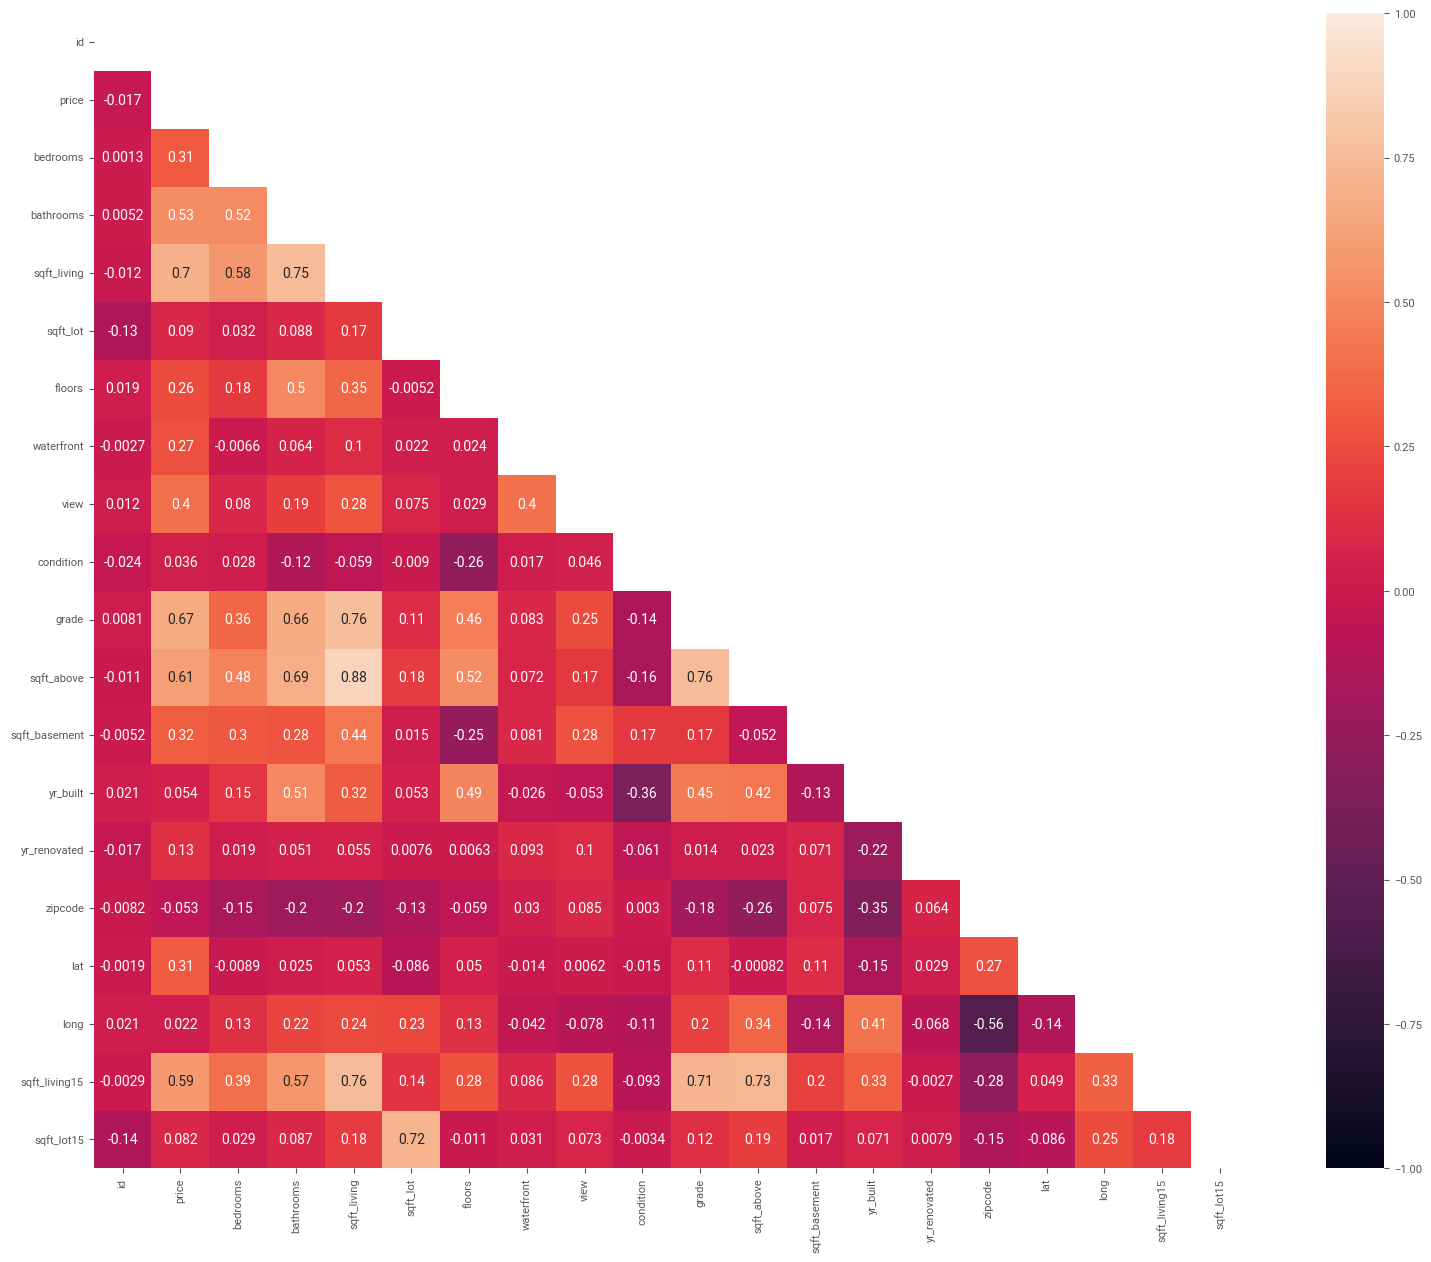

In [14]:
# CORRELATION MATRIX

# Compute the correlation matrix
corr = num_attributes.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square = True, annot=True, vmin=-1, vmax=1)



### We can see a strong positive correlation between bathrooms and (sqft_living15,sqft_above,gade and sqft_living)
### and bewteen sqft_living15 to grade and sqft_above

In [15]:
new_num_attributes = num_attributes[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].copy()
new_num_attributes

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21608 360000.00         3       2.50         1530      1131    3.00   
21609 400000.00         4       2.50         2310      5813    2.00   
21610 402101.00         2       0.75         1020      1350    2.00   
21611 400000.00         3       2.50         1600      2388    2.00   
21612 325000.00         2       0.75         1020      1076    2.00   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode   lat  \
0              3      7        1180              0      1955    98178 47.51   
1              3      7        2170            400      1951    98125 47.72   
2              3      6         770              0      1933    98028 47.74   
3              5      7        1050            910      1965    98136 47.52   
4              3      8        1680              0      1987    98074 47.62   
...          ...    ...         ...            ...       ...      ...   ...   
21608          3      8        1530              0      2009    98103 47.70   
21609          3      8        2310              0      2014    98146 47.51   
21610          3      7        1020              0      2009    98144 47.59   
21611          3      8        1600              0      2004    98027 47.53   
21612          3      7        1020              0      2008    98144 47.59   

         long  sqft_living15  sqft_lot15  
0     -122.26           1340        5650  
1     -122.32           1690        7639  
2     -122.23           2720        8062  
3     -122.39           1360        5000  
4     -122.05           1800        7503  
...       ...            ...         ...  
21608 -122.35           1530        1509  
21609 -122.36           1830        7200  
21610 -122.30           1020        2007  
21611 -122.07           1410        1287  
21612 -122.30           1020        1357  

[21613 rows x 16 columns]

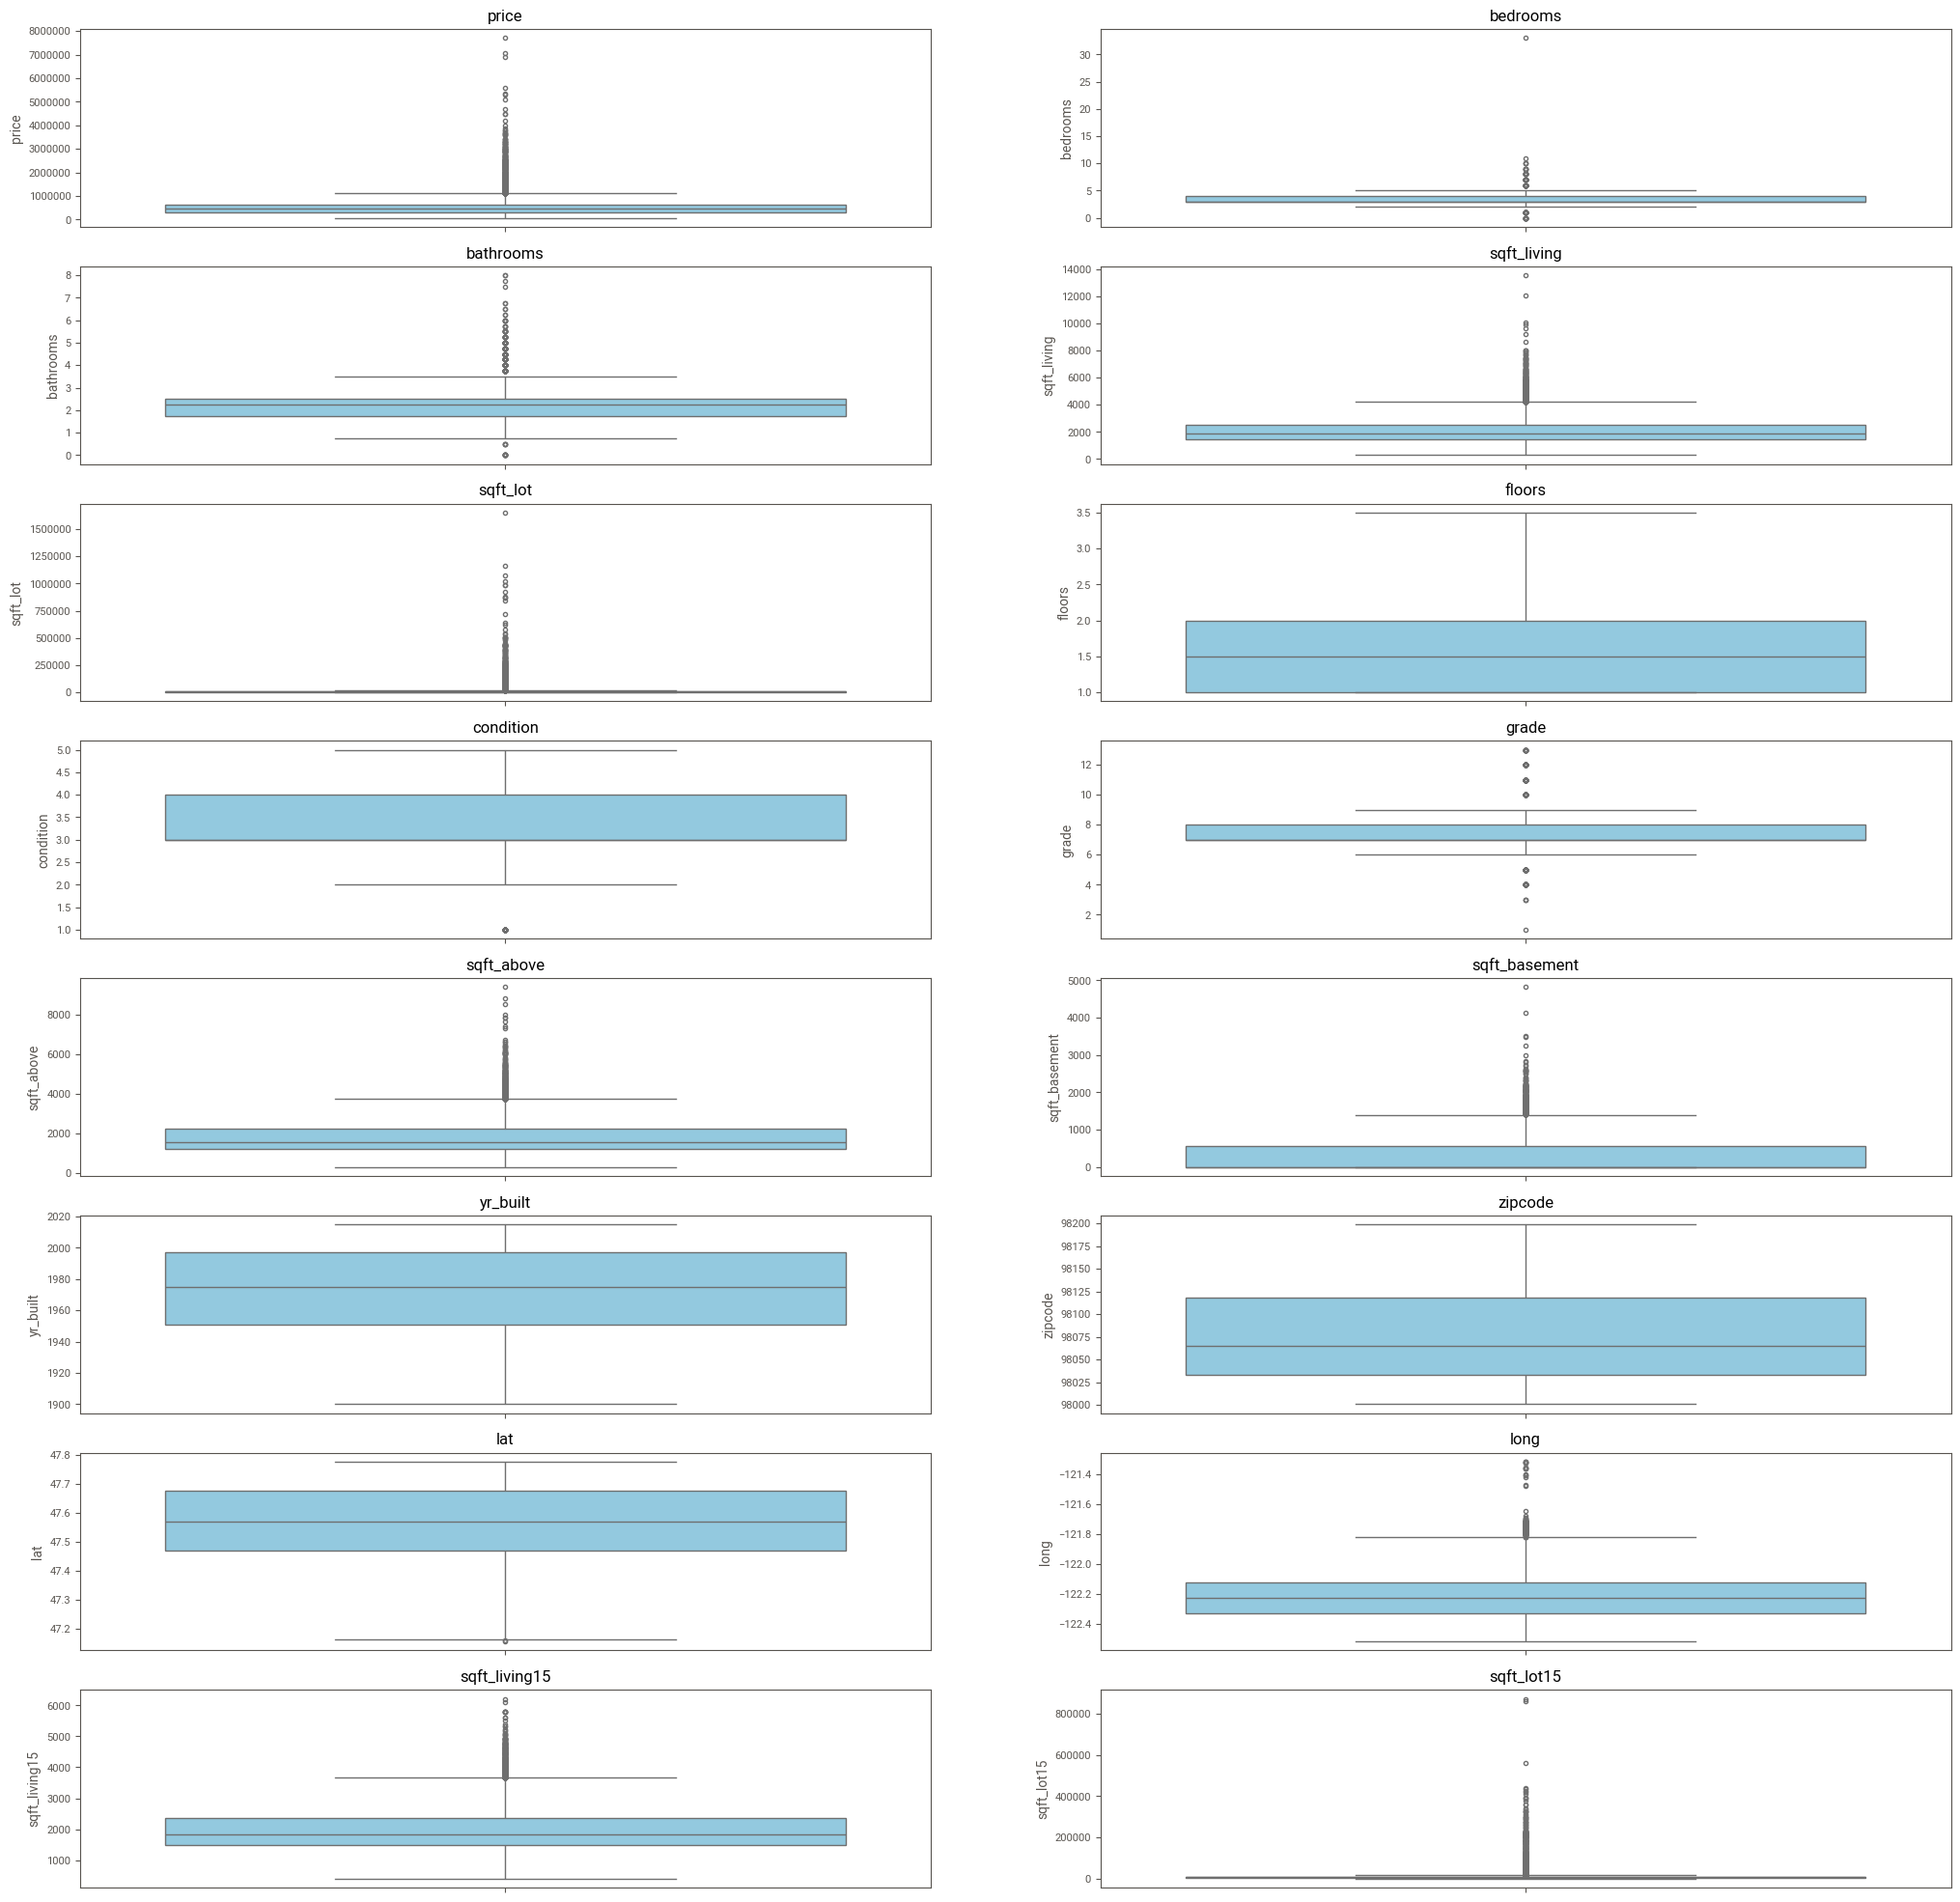

In [16]:
#BoxPlot
fig, axes = plt.subplots(8, 2, figsize=(25, 25))
# Lista com os nomes das colunas e os eixos
colunas = new_num_attributes.columns
eixos = axes.flatten()  # transforma a matriz em uma lista

# boxplots
for i, col in enumerate(colunas):
    sns.boxplot(data=new_num_attributes, y=col, ax=eixos[i], color='skyblue')
    eixos[i].set_title(f'{col}')


plt.show()

## Hypotheses

###  H1: Seasonality: Properties sold during the Summer have a median price at least 10% higher than those sold during the Winter.

In [34]:
#Summer in USA occurs from June to September
df =data.copy()
df['season'] = df['date'].dt.month.apply(lambda x: 'summer' if x in [6,7,8,9] else 'not_summer')
df2 = df.groupby('season')['price'].mean().reset_index()
total_price = df2['price'].sum()
df2['percent'] = df2['price'].apply(lambda x: x/total_price*100)
df2
print('FALSE: Summer percentage of median price is {:.2f}%, which is not +10% more '.format(df2['percent'][1]))

FALSE: Summer percentage of median price is 50.21%, which is not +10% more 


### H2: Waterfront Value: Houses with a waterfront view are, on average, 100% more expensive than those without one.

In [36]:
df = data.copy()
df2=df.groupby('waterfront')['price'].mean().reset_index()
df2['percent'] = df2['price'].apply(lambda x: x/total_price*100)
df2
print('TRUE: Properties with Waterfront view are 3 times more expensive {:.2f}% then the properties which does not have waterfront view  {:.2f}% '.format(df2['percent'][1],df2['percent'][0]))

TRUE: Properties with Waterfront view are 3 times more expensive 153.69% then the properties which does not have waterfront view  49.16% 


### H3: Renovation Impact: Properties that have been renovated have a median price 20% higher than properties that have never been renovated.

In [44]:
df = data.copy()
df['renovated'] =df.apply(lambda x: 'yes' if x['yr_renovated'] >0 else 'no', axis=1)
df2=df.groupby('renovated')['price'].mean().reset_index()
df2['percent'] = df2['price'].apply(lambda x: x/total_price*100)
df2
print('TRUE: Properties which was renovated have {:.2f}% while perperties which were not renovated has {:.2f}%, in other words 20% more. '.format(df2['percent'][1],df2['percent'][0]))

TRUE: Properties which was renovated have 70.32% while perperties which were not renovated has 49.05%, in other words 20% more. 


### H4: Basement Influence: Houses with a basement are more expensive than houses without one, regardless of the total living square footage.

In [47]:
df = data.copy()
df['sqft_basement'] =df.apply(lambda x: 'yes' if x['sqft_basement'] >0 else 'no', axis=1)
df2=df.groupby('sqft_basement')['price'].mean().reset_index()
df2['percent'] = df2['price'].apply(lambda x: x/total_price*100)
df2
print('TRUE: Properties which has basement are more expensive {:.2f}% than perperties which does not have basement {:.2f}% '.format(df2['percent'][1],df2['percent'][0]))

TRUE: Properties which has basement are more expensive 57.56% than perperties which does not have basement 45.03% 


### H5: Age vs. Price: Properties built before 1950 are cheaper than those built after 1950.

In [59]:
df = data.copy()
df['age'] =df.apply(lambda x: 'yes' if x['yr_built'] <1950 else 'no', axis=1)
df2=df.groupby('age')['price'].mean().reset_index()
df2['percent'] = df2['price'].apply(lambda x: x/total_price*100)
df2
print('FALSE: Properties aged <1950 are not cheaper {:.2f}% than perperties aged >1950 {:.2f}%, but the difference is insignificant. '.format(df2['percent'][1],df2['percent'][0]))


FALSE: Properties aged <1950 are not cheaper 50.55% than perperties aged >1950 49.77%, but the difference is insignificant. 


### H6: Condition vs. Price: Houses in "Excellent" condition (level 5) are at least 30% more expensive than those in "Fair" condition (level 3).

In [71]:
df = data.copy()
df1 = df.loc[(data['condition'] == 3) | (data['condition'] == 5)]
df1
df2 = df1.groupby('condition')['price'].mean().reset_index()
df2['percent'] = df2['price'].apply(lambda x: x/total_price*100)
df2
print('FALSE: Properties in excellent condition {:.2f}% are no  30% expensive than perperties in fair condition {:.2f}%. '.format(df2['percent'][1],df2['percent'][0]))


FALSE: Properties in excellent condition 56.64% are no  30% expensive than perperties in fair condition 50.13%. 


# CEO Questions

## Data Overview

### 1. How many houses are available for purchase?

In [18]:
print("There are {} houses".format(data.shape[0]))

There are 21613 houses


### 2. How many attributes do the houses have?

In [19]:
print("There are {} attributes for the houses".format(data.shape[1]))

There are 21 attributes for the houses


### 3. What are the attributes of the houses?

In [20]:
attr = list(data.columns)
print ( 'the attributes are:')
for i in attr:
    print(i)

the attributes are:
id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


### 4. Which is the most expensive house (the house with the highest selling price)?

In [21]:
#print("The most expesnive house cost: {}".format(data['price'].max()))
var=data[['id','price']].sort_values('price',ascending=False).iloc[0]
print("The most expenside house has ID {} and cost {}".format(var["id"],var["price"]))

The most expenside house has ID 6762700020.0 and cost 7700000.0


### 5. Which house has the highest number of bedrooms?

In [22]:
var = data[['id','bedrooms']].sort_values('bedrooms',ascending=False).iloc[0]
print("Highest number of bedrooms belong to ID {} with {} bedrooms.".format(var['id'],var['bedrooms']))

Highest number of bedrooms belong to ID 2402100895 with 33 bedrooms.


### 6. What is the total number of bedrooms in the dataset?

In [23]:
var = data['bedrooms'].sum()
print("Total of bedroom is {}.".format(var))

Total of bedroom is 72854.


### 7. How many houses have 2 bathrooms?

In [24]:
#3 ways
var = data[['bathrooms']][data['bathrooms']==2].count()
var1 = data.query('bathrooms==2').count().iloc[1]
var2 =data[(data.bathrooms == 2)].count().iloc[1]
print("Total of houses with 2 bathrooms is {}.".format(var))
print("Total of houses with 2 bathrooms is {}.".format(var1))
print("Total of houses with 2 bathrooms is {}.".format(var2))

Total of houses with 2 bathrooms is bathrooms    1930
dtype: int64.
Total of houses with 2 bathrooms is 1930.
Total of houses with 2 bathrooms is 1930.


### 8. How many houses have more than 2 floors?

In [25]:
#3 ways
var = data[['floors']][data['floors']>2].count()
var1 = data.query('floors > 2').count().iloc[1]
var2 =data[(data.floors> 2)].count().iloc[1]
print("Total of houses with more than 2 floors is {}.".format(var))
print("Total of houses with more than 2 floors is {}.".format(var1))
print("Total of houses with more than 2 floors is {}.".format(var2))

Total of houses with more than 2 floors is floors    782
dtype: int64.
Total of houses with more than 2 floors is 782.
Total of houses with more than 2 floors is 782.


### 9. How many houses have a sea view?

In [26]:
#3 ways
var = data[['waterfront']][data['waterfront']==1].count()
var1 = data.query('waterfront == 1').count().iloc[1]
var2 =data[(data.waterfront == 1)].count().iloc[1]
print("Total of houses with waterfront is {}.".format(var))
print("Total of houses with waterfront is {}.".format(var1))
print("Total of houses with  waterfront {}.".format(var2))

Total of houses with waterfront is waterfront    163
dtype: int64.
Total of houses with waterfront is 163.
Total of houses with  waterfront 163.


### 10. Among the houses with a sea view, how many have 3 bedrooms?

In [27]:
var = data.query('waterfront == 1')
var1 =var.query('bedrooms ==3').count().iloc[0]
print("Total of houses with  waterfront and 3 bedrooms is {}.".format(var1))


Total of houses with  waterfront and 3 bedrooms is 64.


### 11. What is the average price of all houses in the dataset?

In [28]:
var = data['price'].mean()
var
print("Average price of all houses in the dataset is {}.".format(var))


Average price of all houses in the dataset is 540088.1417665294.


### 12. What is the average price of houses with 2 bathrooms?

In [29]:
var = data[data['bathrooms'] == 2]

print("Average price of houses with 2 bathrooms is {}.".format(var['price'].mean()))

Average price of houses with 2 bathrooms is 457889.7186528497.


### 13. What is the minimum price among houses with 3 bedrooms?

In [30]:
var  = data[(data.bedrooms == 3)]
print("The minimum price for house with 3 bedroomsis {}.".format(var['price'].min()))

The minimum price for house with 3 bedroomsis 82000.0.


### 14. How many houses have more than 300 square meters of living room area?

In [31]:
var = data.query('sqft_living15 > 300')
print("The amount of house with with more than 300 square meters is {}.".format(var.count().iloc[0]))

The amount of house with with more than 300 square meters is 21613.


### 15. Among the houses with more than 300 square meters of living room area, how many have more than 2 bathrooms?

In [32]:
var = data.query('sqft_living15 > 300 & bathrooms >2')
print("The amount of house with with more than 300 square meters and more than 2 bathrooms is {}.".format(var.count().iloc[0]))

The amount of house with with more than 300 square meters and more than 2 bathrooms is 11242.


### 16. What is the date of the oldest property in the portfolio?

In [33]:
var  = data.sort_values('date', ascending=True)
print( var['date'].iloc[0])

2014-05-02 00:00:00


### 17. How many properties have the maximum number of floors?

In [34]:
#first method
floor_list = list(data['floors'].unique())
floor_list_max = max(floor_list)
floor_list_max
var = data.query('floors == @floor_list_max').count().iloc[0]
var
print("First method: The amount of properties with maximum number of floors is {}.".format(var))
#second method

#retorna apenas as linhas verdadeiras
#print(data[data['floors']==3.5][['floors','id']])
#traz o numero de linhas e colunas
var1 = data[data['floors']==3.5][['floors','id']].shape[0]
print("Second method: The amount of properties with maximum number of floors is {}.".format(var1))


First method: The amount of properties with maximum number of floors is 8.
Second method: The amount of properties with maximum number of floors is 8.


### 18. Create a classification for properties, separating them into low-end and high-end categories based on price:

- Above R$540,000 → **High-end**
- Below R$540,000 → **Low-end**

In [35]:
#Creating a new column
data['level'] = 'to_definev'
data.loc[data['price'] >540000, ['level']]= 'high_level'
data.loc[data['price'] <540000, ['level']]= 'low_level'
data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...        1180              0   
1      7242    2.00           0     0  ...        2170            400   
2     10000    1.00           0     0  ...         770              0   
3      5000    1.00           0     0  ...        1050            910   
4      8080    1.00           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0      1955             0    98178 47.51 -122.26           1340        5650   
1      1951          1991    98125 47.72 -122.32           1690        7639   
2      1933             0    98028 47.74 -122.23           2720        8062   
3      1965             0    98136 47.52 -122.39           1360        5000   
4      1987             0    98074 47.62 -122.05           1800        7503   

        level  
0   low_level  
1   low_level  
2   low_level  
3  high_level  
4   low_level  

[5 rows x 22 columns]

### 19. Property Report Ordered by Price

I would like a report sorted by price containing the following information:

- Property ID  
- Date the property became available for purchase  
- Number of bedrooms  
- Lot size (sqtf_lot)  
- Price  
- Property classification (high-end or low-end)


In [36]:
report= data[['id','date','price','bedrooms','sqft_lot','level']]
report=report.sort_values('price',ascending=False)
# salving as .csv
report.to_csv('datasets/report_question19.csv', index=False) #index false reseta o indice

### 20. Property Locations Map

Create a map displaying the geographic distribution of properties based on their latitude and longitude.


In [37]:

data_mapa=data[['id','lat','long','price']]
lat_center = data_mapa['lat'].mean()
lon_center = data_mapa['long'].mean()
print(data_mapa)
mapa=px.scatter_map(data_mapa, lat='lat',lon='long', hover_name='id',
                hover_data=['price'],color_discrete_sequence=['fuchsia'],
                zoom=9, center={'lat': lat_center, 'lon': lon_center}, height=300)

 #desenhando o layout do mapa
mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height=600,margin={'r':0,'t':0,'l':0,'b':0})#right,top,left,bottom
mapa.show()
mapa.write_html('datasets/mapa_house_rocket.html')

               id   lat    long     price
0      7129300520 47.51 -122.26 221900.00
1      6414100192 47.72 -122.32 538000.00
2      5631500400 47.74 -122.23 180000.00
3      2487200875 47.52 -122.39 604000.00
4      1954400510 47.62 -122.05 510000.00
...           ...   ...     ...       ...
21608   263000018 47.70 -122.35 360000.00
21609  6600060120 47.51 -122.36 400000.00
21610  1523300141 47.59 -122.30 402101.00
21611   291310100 47.53 -122.07 400000.00
21612  1523300157 47.59 -122.30 325000.00

[21613 rows x 4 columns]


### 21. Create a new column called: `house_age`

- If the value in the `date` column is greater than `2014-01-01` → `'new_house'`
- If the value in the `date` column is less than `2014-01-01` → `'old_house'`

In [38]:
data['house_age'] ="to_define"
data.loc[data['date'] >"2014-01-01", 'house_age']= 'new_house'
data.loc[data['date'] <"2014-01-01", 'house_age']= 'old_house'
data
var1 = data.query("house_age == 'new_house'")
var2 = data.loc[data['house_age'] == 'new_house']
var2

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221900.00         3       1.00         1180   
1      6414100192 2014-12-09 538000.00         3       2.25         2570   
2      5631500400 2015-02-25 180000.00         2       1.00          770   
3      2487200875 2014-12-09 604000.00         4       3.00         1960   
4      1954400510 2015-02-18 510000.00         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 360000.00         3       2.50         1530   
21609  6600060120 2015-02-23 400000.00         4       2.50         2310   
21610  1523300141 2014-06-23 402101.00         2       0.75         1020   
21611   291310100 2015-01-16 400000.00         3       2.50         1600   
21612  1523300157 2014-10-15 325000.00         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650    1.00           0     0  ...              0      1955   
1          7242    2.00           0     0  ...            400      1951   
2         10000    1.00           0     0  ...              0      1933   
3          5000    1.00           0     0  ...            910      1965   
4          8080    1.00           0     0  ...              0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21608      1131    3.00           0     0  ...              0      2009   
21609      5813    2.00           0     0  ...              0      2014   
21610      1350    2.00           0     0  ...              0      2009   
21611      2388    2.00           0     0  ...              0      2004   
21612      1076    2.00           0     0  ...              0      2008   

       yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0                 0    98178 47.51 -122.26           1340        5650   
1              1991    98125 47.72 -122.32           1690        7639   
2                 0    98028 47.74 -122.23           2720        8062   
3                 0    98136 47.52 -122.39           1360        5000   
4                 0    98074 47.62 -122.05           1800        7503   
...             ...      ...   ...     ...            ...         ...   
21608             0    98103 47.70 -122.35           1530        1509   
21609             0    98146 47.51 -122.36           1830        7200   
21610             0    98144 47.59 -122.30           1020        2007   
21611             0    98027 47.53 -122.07           1410        1287   
21612             0    98144 47.59 -122.30           1020        1357   

            level  house_age  
0       low_level  new_house  
1       low_level  new_house  
2       low_level  new_house  
3      high_level  new_house  
4       low_level  new_house  
...           ...        ...  
21608   low_level  new_house  
21609   low_level  new_house  
21610   low_level  new_house  
21611   low_level  new_house  
21612   low_level  new_house  

[21613 rows x 23 columns]

### 22. Create a new column called: `dormitory_type`

- If the value in the `bedrooms` column is equal to 1 → `'studio'`
- If the value in the `bedrooms` column is equal to 2 → `'apartment'`
- If the value in the `bedrooms` column is greater than 2 → `'house'`

In [39]:
data['dormitory_type'] ="to_define"
data.loc[data['bedrooms'] ==1, 'dormitory_type']= 'studio'
data.loc[data['bedrooms'] ==2, 'dormitory_type']= 'apartment'
data.loc[data['bedrooms'] >2, 'dormitory_type']= 'house'
print(data.head(10))

           id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.00         3       1.00         1180   
1  6414100192 2014-12-09  538000.00         3       2.25         2570   
2  5631500400 2015-02-25  180000.00         2       1.00          770   
3  2487200875 2014-12-09  604000.00         4       3.00         1960   
4  1954400510 2015-02-18  510000.00         3       2.00         1680   
5  7237550310 2014-05-12 1225000.00         4       4.50         5420   
6  1321400060 2014-06-27  257500.00         3       2.25         1715   
7  2008000270 2015-01-15  291850.00         3       1.50         1060   
8  2414600126 2015-04-15  229500.00         3       1.00         1780   
9  3793500160 2015-03-12  323000.00         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650    1.00           0     0  ...      1955             0    98178   
1      7242    2.00           0     0 

### 23. Create a new column called: `condition_type`

- If the value in the `condition` column is less than or equal to 2 → `'bad'`
- If the value in the `condition` column is equal to 3 or 4 → `'regular'`
- If the value in the `condition` column is equal to 5 → `'good'`

In [40]:
data['condition_type'] ="to_define"
data.loc[data['condition'] ==2, 'condition_type']= 'bad'
data.loc[data['condition'] ==3, 'condition_type']= 'regular'
data.loc[data['condition'] ==4, 'condition_type']= 'regular'
data.loc[data['condition'] ==5, 'condition_type']= 'good'
print(data.head(20))
print(data.dtypes)

            id       date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520 2014-10-13  221900.00         3       1.00         1180   
1   6414100192 2014-12-09  538000.00         3       2.25         2570   
2   5631500400 2015-02-25  180000.00         2       1.00          770   
3   2487200875 2014-12-09  604000.00         4       3.00         1960   
4   1954400510 2015-02-18  510000.00         3       2.00         1680   
5   7237550310 2014-05-12 1225000.00         4       4.50         5420   
6   1321400060 2014-06-27  257500.00         3       2.25         1715   
7   2008000270 2015-01-15  291850.00         3       1.50         1060   
8   2414600126 2015-04-15  229500.00         3       1.00         1780   
9   3793500160 2015-03-12  323000.00         3       2.50         1890   
10  1736800520 2015-04-03  662500.00         3       2.50         3560   
11  9212900260 2014-05-27  468000.00         2       1.00         1160   
12   114101516 2014-05-28  310000.00  

### 24. Change the data type of the `condition` column to STRING

In [41]:
data['condition']=data['condition'].astype(str)
print(data.dtypes)

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
dtype: object


### 25. Delete the columns: `sqft_living15` and `sqft_lot15`

In [42]:
cols=["sqft_living15","sqft_lot15"]
data=data.drop(cols, axis=1) # axis=1 -> deleta as linhas ao longo das colunas
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'level', 'house_age', 'dormitory_type',
       'condition_type'],
      dtype='object')


### 26. Change the data type of the `yr_built` column to DATE

In [43]:

data['yr_built'] = pd.to_datetime( data['yr_built'], format="%Y", errors= 'coerce') # coerce vira NAT (Not a time)
var1 = data['yr_built'].isna().sum()
print('There are {} lines without a year'.format(var1))

There are 0 lines without a year


### 27. Change the data type of the `yr_renovated` column to DATE

In [44]:
data['yr_renovated'] = pd.to_datetime( data['yr_renovated'], format="%Y", errors= 'coerce')#datetime sempre cria um obeto datetime completo, vai retornar ano, mes dia e hora
#print(data.dtypes)
data['yr_renovated'] = data['yr_renovated'].dt.year
#data['yr_renovated'] = data['yr_renovated'].dt.to_period('Y')
var1 = data['yr_renovated'].isna().sum()
print('There are {} lines without a year renovated info'.format(var1))
data['yr_renovated'].unique()

There are 20699 lines without a year renovated info


array([  nan, 1991., 2002., 2010., 1999., 1992., 2013., 1994., 1978.,
       2005., 2008., 2003., 1984., 1954., 2014., 2011., 1974., 1983.,
       1945., 1990., 1988., 1957., 1977., 1981., 1995., 2000., 1998.,
       1970., 1989., 2004., 1986., 2009., 2007., 1987., 1973., 2006.,
       1985., 2001., 1980., 1971., 1979., 1997., 1950., 1969., 1948.,
       2015., 1968., 2012., 1963., 1951., 1993., 1962., 1996., 1972.,
       1953., 1955., 1982., 1956., 1940., 1976., 1946., 1975., 1958.,
       1964., 1959., 1960., 1967., 1965., 1934., 1944.])

### 28. What is the oldest construction year of a property?

In [45]:
var = data[['yr_built']].sort_values('yr_built',ascending=True).iloc[0]
var

yr_built   1900-01-01
Name: 4697, dtype: datetime64[ns]

### 29. What is the oldest renovation year of a property?

In [46]:
var = data.loc[data['yr_renovated'].notna()]
var1=var[['yr_renovated']].sort_values('yr_renovated',ascending=True)
#print(var1)
#data.loc[data['id']==6414100192]
var1.iloc[0]


yr_renovated   1934.00
Name: 13736, dtype: float64

### 30. How many properties have 2 floors?

In [47]:
data.loc[data['floors'] ==2].shape[0]

8241

### 31. How many properties have the condition equal to `"regular"`?

In [48]:
print(data[data['condition_type']=="regular"][['condition_type','id']])

      condition_type          id
0            regular  7129300520
1            regular  6414100192
2            regular  5631500400
4            regular  1954400510
5            regular  7237550310
...              ...         ...
21608        regular   263000018
21609        regular  6600060120
21610        regular  1523300141
21611        regular   291310100
21612        regular  1523300157

[19710 rows x 2 columns]


### 32. How many properties have the condition equal to `"bad"` and have a `"waterfront view"`?

In [49]:
bad_type=data[data['condition_type']=="bad"]
bad_waterfront=bad_type[bad_type['waterfront']==1][['condition_type','waterfront']]
print(bad_waterfront.shape[0])

1


### 33. How many properties have the condition equal to `"good"` and are classified as `"new_house"`?

In [50]:
good_condition=data[data['condition_type']=="good"]
print(good_condition[good_condition['house_age']=="new_house"][['condition_type','house_age']])

      condition_type  house_age
3               good  new_house
25              good  new_house
27              good  new_house
49              good  new_house
62              good  new_house
...              ...        ...
19604           good  new_house
19620           good  new_house
19873           good  new_house
19905           good  new_house
21303           good  new_house

[1701 rows x 2 columns]


### 34. What is the highest price of a `"studio"` type property?

In [51]:
studio_dormitory_type=data[data['dormitory_type']=="studio"]
print( studio_dormitory_type['price'].sort_values(ascending=False).iloc[0])

1247000.0


### 35. How many `"apartment"` properties were renovated in 2015?

In [52]:
var = data[data['dormitory_type']=="apartment"]
#print(apartment_dormitory_type)
var2 = var[var['yr_renovated']==2015]
var2

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, level, house_age, dormitory_type, condition_type]
Index: []

[0 rows x 23 columns]

### 36. What is the maximum number of bedrooms that a `"house"` type property has?

In [53]:
var=data[data['dormitory_type']=="house"]
var1=var['bedrooms'].sort_values(ascending=False)
print(var1.iloc[0])

33


### 37. How many `"new_house"` properties were renovated in the year 2014?

In [54]:
new_house=data[data['yr_renovated']==2014]
print(new_house[new_house['house_age']=="new_house"])

               id       date      price  bedrooms  bathrooms  sqft_living  \
379    7132300695 2015-04-21  435000.00         3       1.50         1300   
435    2268400350 2014-09-16  749000.00         4       2.50         1710   
891    1962200435 2014-11-10 1010000.00         4       1.00         1820   
1379   1453600202 2014-05-20  520000.00         4       3.50         2680   
1449   8651430560 2014-05-22  180000.00         3       1.00          870   
...           ...        ...        ...       ...        ...          ...   
19133  7151700360 2014-12-11 1028950.00         5       3.25         2680   
19174  2420069220 2014-12-03  209000.00         3       1.00         1320   
19276  2397100705 2014-07-14 1518630.00         4       4.25         3650   
19593   421059018 2014-11-04  257000.00         3       1.75         1397   
20447  3319500628 2015-02-12  356999.00         3       1.50         1010   

       sqft_lot  floors  waterfront  view  ... sqft_basement   yr_built  \


### 38. Select the columns: `id`, `date`, `price`, `floors`, `zipcode` using:



#### 38.1. Directly by column names  


In [55]:
print(data[["id", "date", "price", "floors", "zipcode"]])

               id       date     price  floors  zipcode
0      7129300520 2014-10-13 221900.00    1.00    98178
1      6414100192 2014-12-09 538000.00    2.00    98125
2      5631500400 2015-02-25 180000.00    1.00    98028
3      2487200875 2014-12-09 604000.00    1.00    98136
4      1954400510 2015-02-18 510000.00    1.00    98074
...           ...        ...       ...     ...      ...
21608   263000018 2014-05-21 360000.00    3.00    98103
21609  6600060120 2015-02-23 400000.00    2.00    98146
21610  1523300141 2014-06-23 402101.00    2.00    98144
21611   291310100 2015-01-16 400000.00    2.00    98027
21612  1523300157 2014-10-15 325000.00    2.00    98144

[21613 rows x 5 columns]


#### 38.2. By column indices  


In [56]:
print(data.iloc[:,[0,1,2,7,16]])

               id       date     price  floors  zipcode
0      7129300520 2014-10-13 221900.00    1.00    98178
1      6414100192 2014-12-09 538000.00    2.00    98125
2      5631500400 2015-02-25 180000.00    1.00    98028
3      2487200875 2014-12-09 604000.00    1.00    98136
4      1954400510 2015-02-18 510000.00    1.00    98074
...           ...        ...       ...     ...      ...
21608   263000018 2014-05-21 360000.00    3.00    98103
21609  6600060120 2015-02-23 400000.00    2.00    98146
21610  1523300141 2014-06-23 402101.00    2.00    98144
21611   291310100 2015-01-16 400000.00    2.00    98027
21612  1523300157 2014-10-15 325000.00    2.00    98144

[21613 rows x 5 columns]



#### 38.3. By row indices and column names  


In [57]:
selected_coluns = data.loc[0:5, ["id", "date", "price", "floors", "zipcode"]]
print(selected_coluns)

           id       date      price  floors  zipcode
0  7129300520 2014-10-13  221900.00    1.00    98178
1  6414100192 2014-12-09  538000.00    2.00    98125
2  5631500400 2015-02-25  180000.00    1.00    98028
3  2487200875 2014-12-09  604000.00    1.00    98136
4  1954400510 2015-02-18  510000.00    1.00    98074
5  7237550310 2014-05-12 1225000.00    1.00    98053


### 39. Save a `.csv` file containing only the columns from item 38

In [58]:
selected_coluns.to_csv('datasets/report_ex38.csv', index=False)

### 40. Change the color of the points on the map from `"pink"` to `"dark green"`

In [59]:
data_mapa=data[['id','lat','long','price']]
lat_center = data_mapa['lat'].mean()
lon_center = data_mapa['long'].mean()
mapa=px.scatter_map(data_mapa, lat='lat',lon='long', hover_name='id',
                hover_data=['price'],color_discrete_sequence=['darkgreen'],
                zoom=9, center={'lat': lat_center, 'lon': lon_center}, height=300)

 #desenhando o layout do mapa
mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height=600,margin={'r':0,'t':0,'l':0,'b':0})#right,top,left,bottom
mapa.show()
mapa.write_html('datasets/mapa_house_rocket.html')

### 41. What is the number of properties by construction year?

In [60]:
data[['id','yr_built']].groupby('yr_built').count().reset_index()

yr_built   id
0   1900-01-01   87
1   1901-01-01   29
2   1902-01-01   27
3   1903-01-01   46
4   1904-01-01   45
..         ...  ...
111 2011-01-01  130
112 2012-01-01  170
113 2013-01-01  201
114 2014-01-01  559
115 2015-01-01   38

[116 rows x 2 columns]

### 42. What is the minimum number of bedrooms by property construction year?

In [61]:
data[['bedrooms','yr_built']].groupby('yr_built').min().reset_index()

yr_built  bedrooms
0   1900-01-01         1
1   1901-01-01         2
2   1902-01-01         2
3   1903-01-01         1
4   1904-01-01         2
..         ...       ...
111 2011-01-01         1
112 2012-01-01         2
113 2013-01-01         2
114 2014-01-01         1
115 2015-01-01         1

[116 rows x 2 columns]

### 43. What is the highest purchase price for each number of bedrooms?

In [62]:
data[['price','bedrooms']].groupby('bedrooms').max().reset_index()

bedrooms      price
0          0 1295650.00
1          1 1247000.00
2          2 3278000.00
3          3 3800000.00
4          4 4489000.00
5          5 7062500.00
6          6 7700000.00
7          7 3200000.00
8          8 3300000.00
9          9 1400000.00
10        10 1148000.00
11        11  520000.00
12        33  640000.00

### 44. What is the total sum of purchase prices by number of bedrooms?

In [63]:
data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

bedrooms         price
0          0    5323550.00
1          1   63210934.00
2          2 1107788602.00
3          3 4580263939.00
4          4 4372957028.00
5          5 1259346326.00
6          6  224541613.00
7          7   36145017.00
8          8   14366000.00
9          9    5363999.00
10        10    2458000.00
11        11     520000.00
12        33     640000.00

### 45. What is the total sum of purchase prices by number of bedrooms and bathrooms?

In [64]:
data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum().reset_index()

bedrooms  bathrooms      price
0           0       0.00 3642600.00
1           0       0.75  265000.00
2           0       1.00  228000.00
3           0       1.50  288000.00
4           0       2.50  899950.00
..        ...        ...        ...
139        10       2.00  650000.00
140        10       3.00  660000.00
141        10       5.25 1148000.00
142        11       3.00  520000.00
143        33       1.75  640000.00

[144 rows x 3 columns]

### 46. What is the average living room size of properties by construction year?

In [65]:
data[['sqft_living','yr_built']].groupby('yr_built').mean().reset_index()

yr_built  sqft_living
0   1900-01-01      1732.01
1   1901-01-01      1763.62
2   1902-01-01      1919.63
3   1903-01-01      1507.74
4   1904-01-01      1603.18
..         ...          ...
111 2011-01-01      2313.68
112 2012-01-01      2378.74
113 2013-01-01      2636.59
114 2014-01-01      2615.39
115 2015-01-01      2596.32

[116 rows x 2 columns]

### 47. What is the median living room size of properties by construction year?

In [66]:
data[['sqft_living','yr_built']].groupby('yr_built').median().reset_index()

yr_built  sqft_living
0   1900-01-01      1540.00
1   1901-01-01      1610.00
2   1902-01-01      1600.00
3   1903-01-01      1505.00
4   1904-01-01      1280.00
..         ...          ...
111 2011-01-01      2270.00
112 2012-01-01      2237.50
113 2013-01-01      2580.00
114 2014-01-01      2650.00
115 2015-01-01      2590.00

[116 rows x 2 columns]

### 48. What is the standard deviation of the living room size of properties by construction year?

In [67]:
data[['sqft_living','yr_built']].groupby('yr_built').std().reset_index()

yr_built  sqft_living
0   1900-01-01       732.94
1   1901-01-01       668.23
2   1902-01-01       878.66
3   1903-01-01       469.72
4   1904-01-01      1076.87
..         ...          ...
111 2011-01-01       804.86
112 2012-01-01       771.43
113 2013-01-01       883.50
114 2014-01-01       893.81
115 2015-01-01      1155.61

[116 rows x 2 columns]

### 49. What is the average growth of property purchase prices by year, by day, and by week of the year?

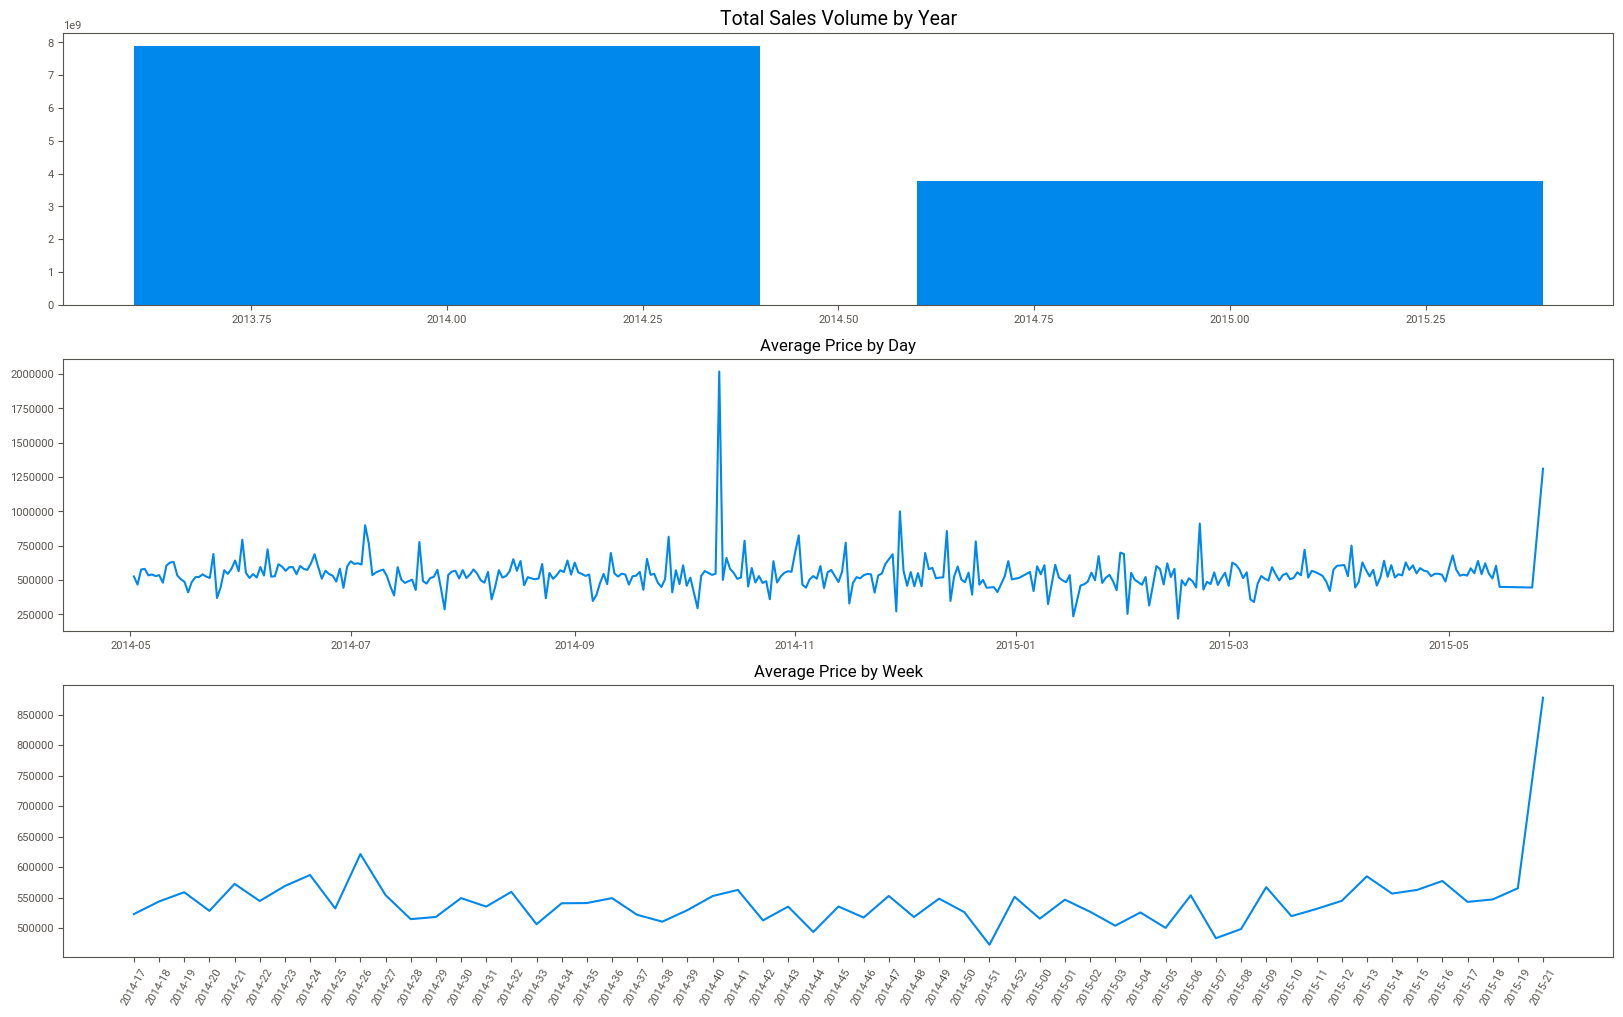

In [68]:
fig=plt.figure(figsize=(20,12))
specs= gridspec.GridSpec(ncols=1,nrows=3,figure=fig)

ax1=fig.add_subplot(specs[0,:])#first row
ax2=fig.add_subplot(specs[1,:]) #second row
ax3=fig.add_subplot(specs[2,:])# third row
#first graph
from matplotlib import pyplot as plt
data['year']=pd.to_datetime(data['date']).dt.year
by_year=data[['price','year']].groupby('year').sum().reset_index()
ax1.bar(by_year['year'],by_year['price'])
ax1.set_title('Total Sales Volume by Year', fontsize=14)

#second graph

data['day']=pd.to_datetime(data['date'])
by_day=data[['price','day']].groupby('day').mean().reset_index()


ax2.plot(by_day['day'],by_day['price'])
ax2.set_title('Average Price by Day', fontsize=12)

#third graph
#%W trás a semana do ano começando na semana e %U começando no domingo 
data['year_week']=pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week=data[['price','year_week']].groupby('year_week').mean().reset_index()


ax3.plot(by_year_week['year_week'],by_year_week['price'])
ax3.set_title('Average Price by Week', fontsize=12)
plt.xticks(rotation=60);

### 50. I would like to look at the map and identify the houses with the highest prices.

In [69]:
house= data[['id','lat','long','price']]

fig= px.scatter_map( house,
                      lat='lat',
                      lon='long',
                      size ='price',
                      color_continuous_scale=px.colors.cyclical.IceFire,
                      size_max=15,
                      zoom=10)
fig.update_layout(mapbox_style ='open-street-map')
fig.update_layout(height=600,margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

### 51. Create a new column called: `dormitory_type`

- If the value in the `bedrooms` column is equal to 1 → `'studio'`
- If the value in the `bedrooms` column is equal to 2 → `'apartment'`
- If the value in the `bedrooms` column is greater than 2 → `'house'`

In [70]:
data['dormitory_type'] ="to_define"
data.loc[data['bedrooms'] ==1, 'dormitory_type']= 'studio'
data.loc[data['bedrooms'] ==2, 'dormitory_type']= 'apartment'
data.loc[data['bedrooms'] >2, 'dormitory_type']= 'house'

### 52. Create a bar chart representing the sum of prices by number of bedrooms.

<BarContainer object of 13 artists>

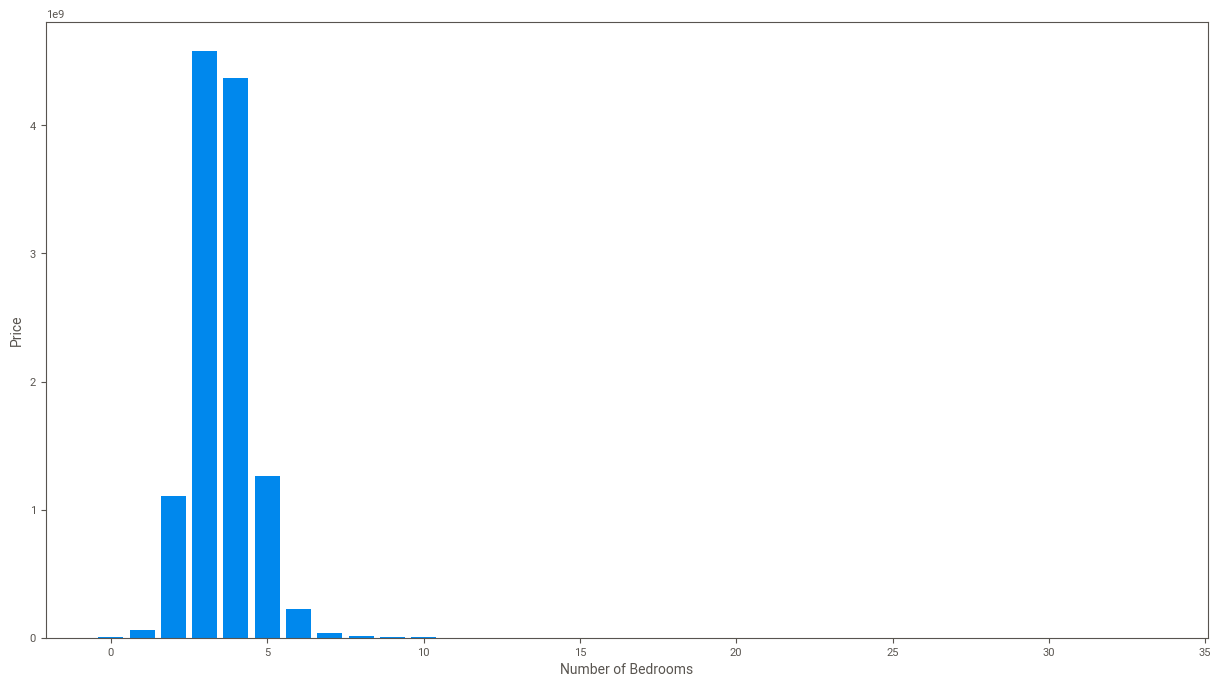

In [71]:
#2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
by_bedrooms=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(15,8))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.bar(by_bedrooms['bedrooms'],by_bedrooms['price'])

### 53. Create a line chart representing the average prices by property construction year.

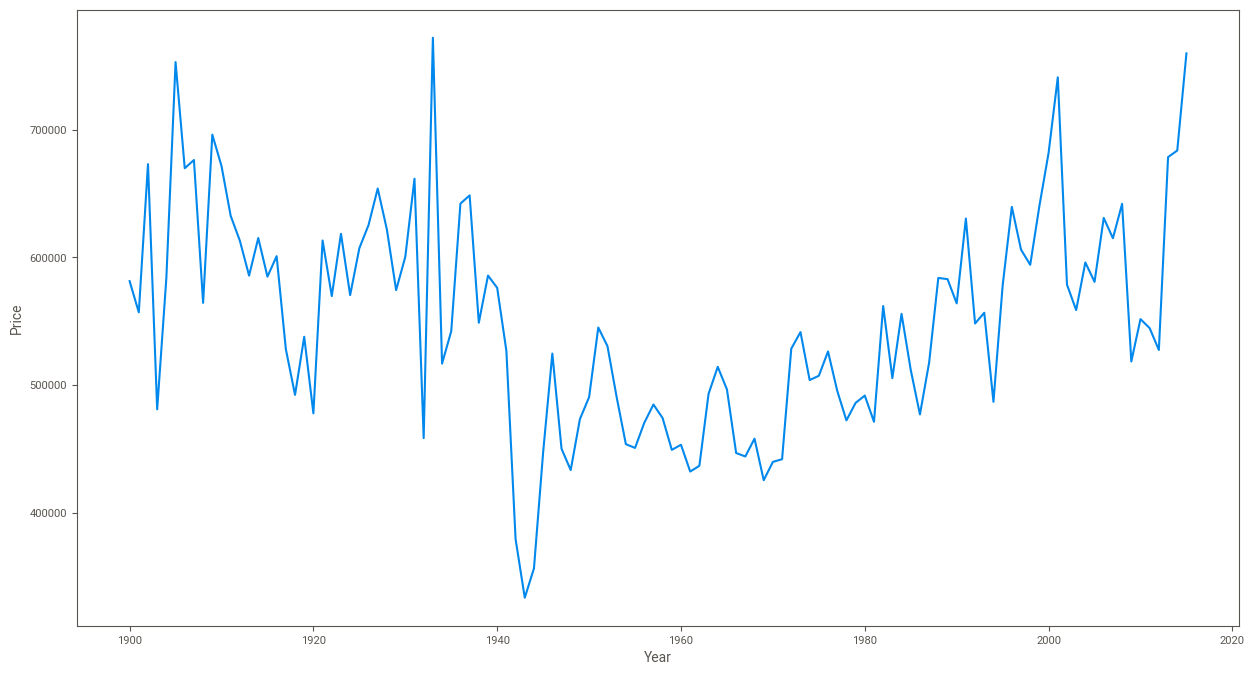

In [72]:
by_yr_built=data[['price','yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(by_yr_built['yr_built'],by_yr_built['price'])


### 54. Create a bar chart representing the average prices by dormitory type.

<BarContainer object of 4 artists>

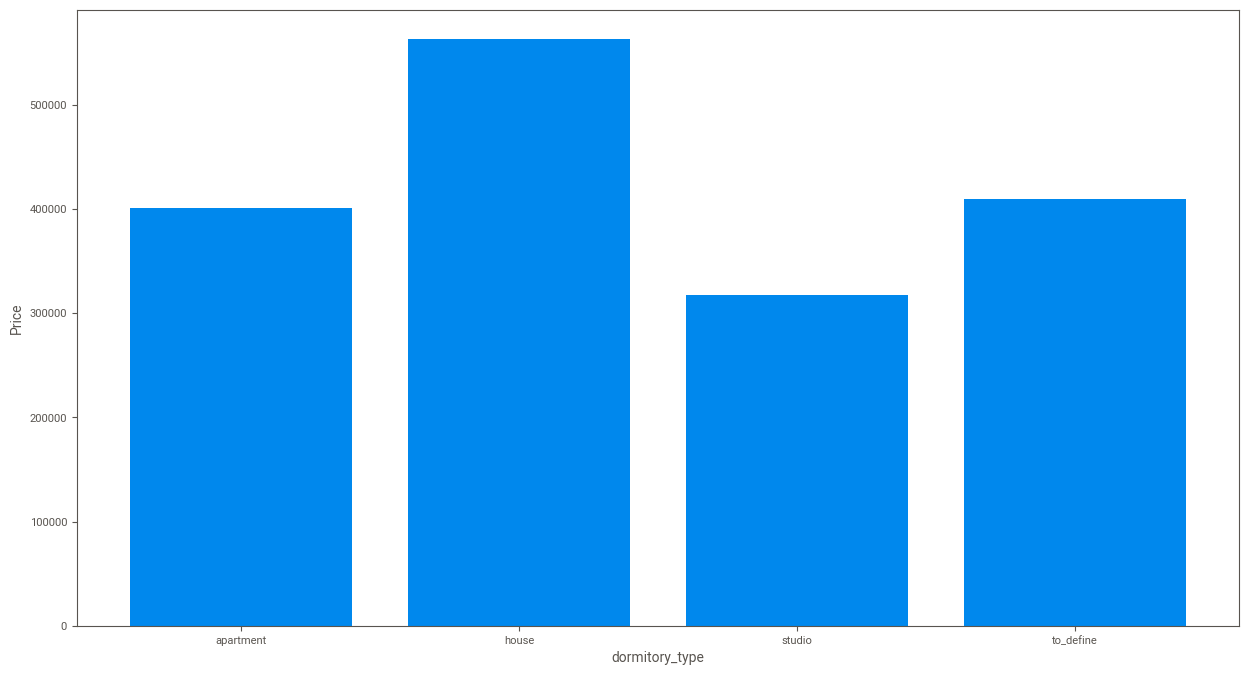

In [73]:
by_dormitory_type=data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.figure(figsize=(15,8))
plt.xlabel('dormitory_type')
plt.ylabel('Price')
plt.bar(by_dormitory_type['dormitory_type'],by_dormitory_type['price'])

### 55. Create a line chart showing the evolution of average prices by renovation year, starting from 1930.

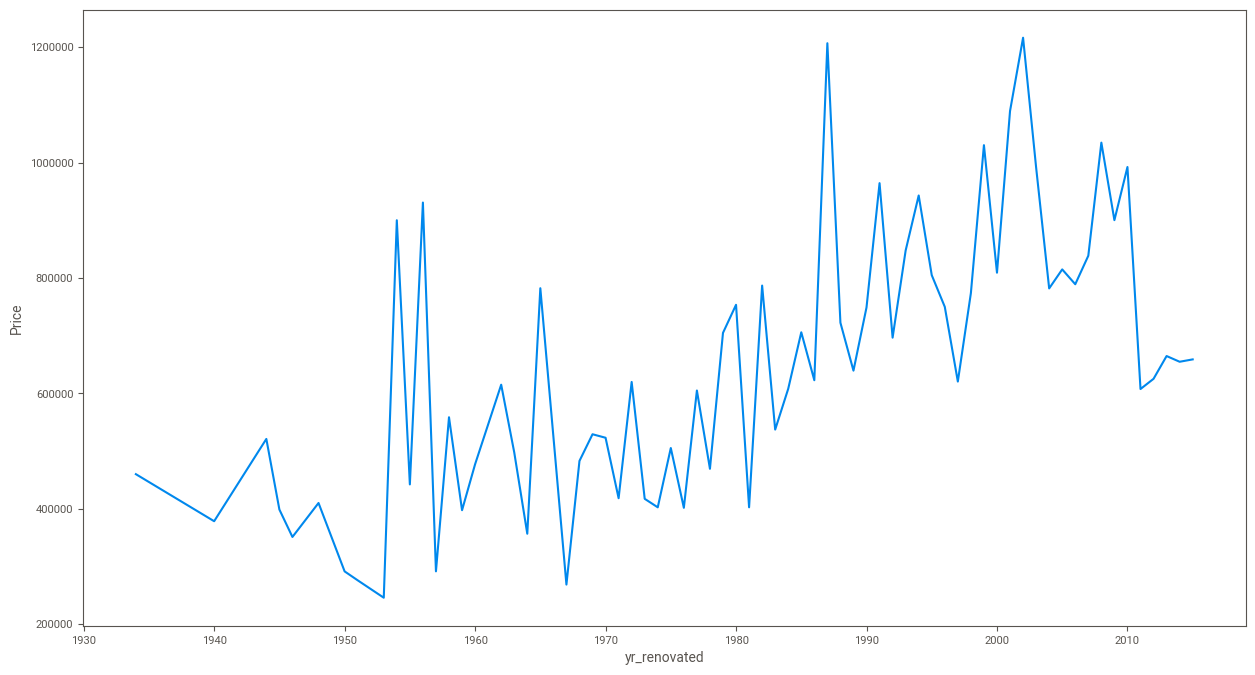

In [74]:
by_yr_renovated=data[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
by_yr_renovated
by_yr_renovated.head()
plt.figure(figsize=(15,8))
plt.xlabel('yr_renovated')
plt.ylabel('Price')
plt.plot(by_yr_renovated['yr_renovated'],by_yr_renovated['price'])


### 56. Create a table showing the average prices by construction year and dormitory type.

In [75]:
data[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()

yr_built dormitory_type     price
0   1900-01-01      apartment 589533.33
1   1900-01-01          house 584854.27
2   1900-01-01         studio 398944.00
3   1901-01-01      apartment 452856.40
4   1901-01-01          house 578619.17
..         ...            ...       ...
309 2014-01-01          house 692687.72
310 2014-01-01         studio 516500.00
311 2015-01-01      apartment 543250.00
312 2015-01-01          house 797383.06
313 2015-01-01         studio 385195.00

[314 rows x 3 columns]


### 57. Create a dashboard with the charts from questions 52, 53, and 54  
(Dashboard layout: 1 row and 2 columns)

Text(0, 0.5, 'Total Price')

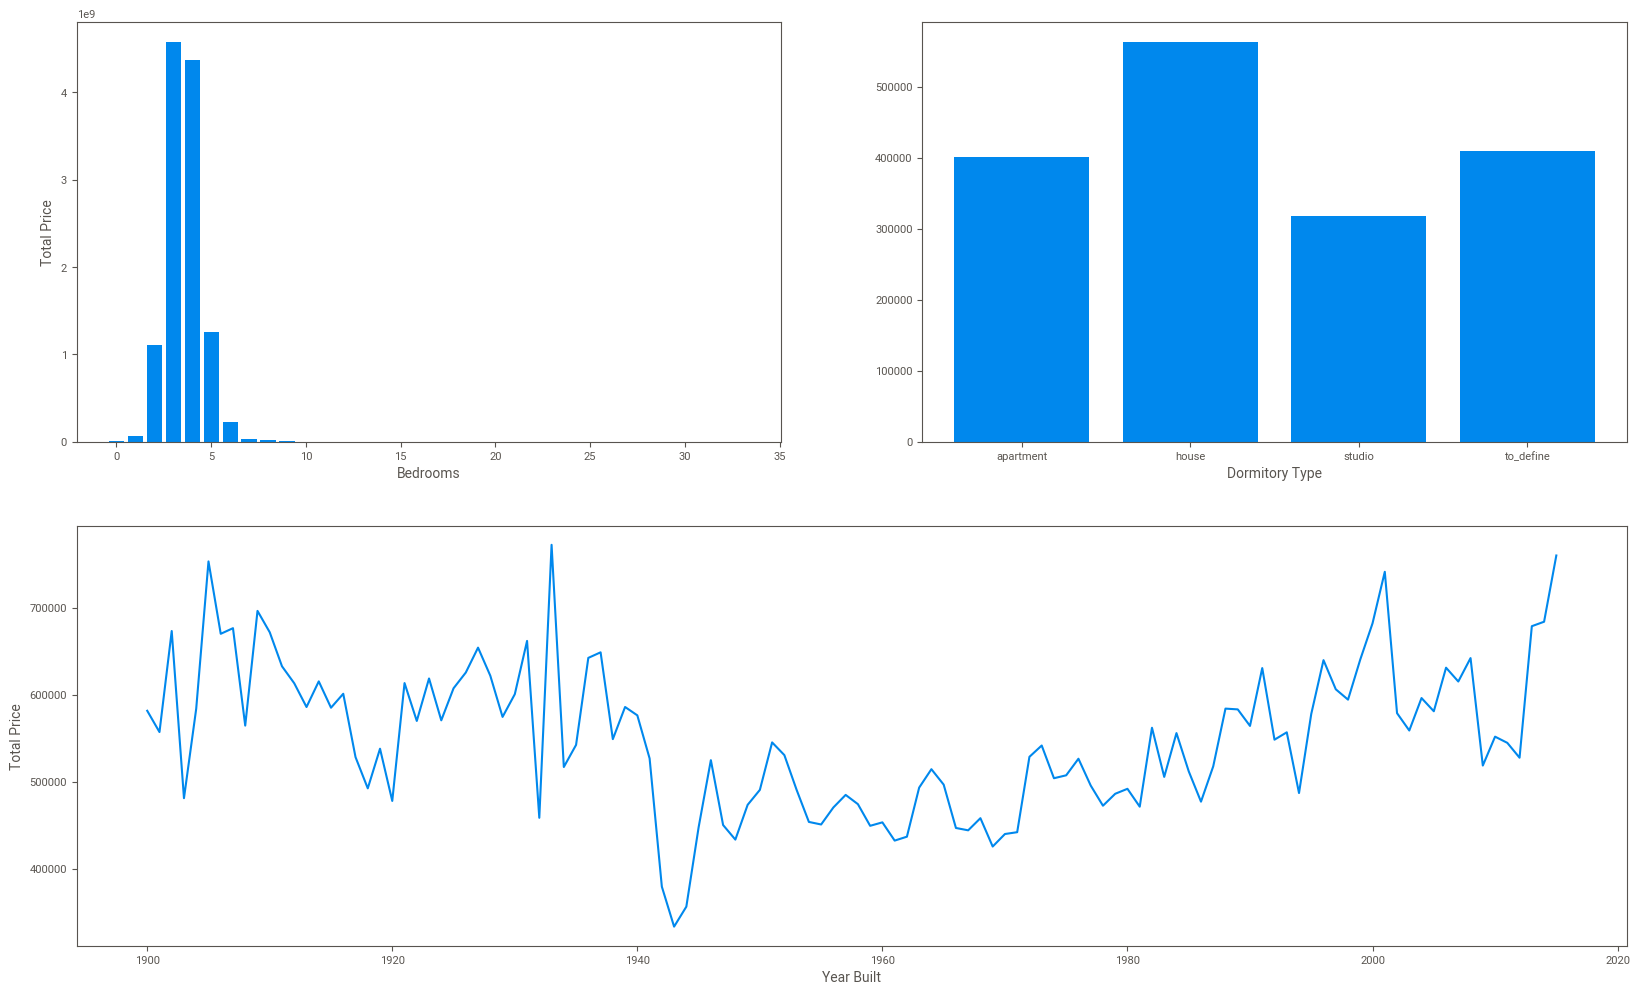

In [76]:
fig=plt.figure(figsize=(20,12))
specs= gridspec.GridSpec(ncols=2,nrows=2,figure=fig)

ax1=fig.add_subplot(specs[0,0])#first col
ax2=fig.add_subplot(specs[0,1]) #second row- first column
ax3=fig.add_subplot(specs[1,:])#second row -second column
ax1.bar(by_bedrooms['bedrooms'],by_bedrooms['price'])
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Total Price')
ax2.bar(by_dormitory_type['dormitory_type'],by_dormitory_type['price'])
ax2.set_xlabel('Dormitory Type')
ax3.plot(by_yr_built['yr_built'],by_yr_built['price'])
ax3.set_xlabel('Year Built')
ax3.set_ylabel('Total Price')

### 58. Create a dashboard with the charts from questions 52 and 54  
(Dashboard layout: 2 columns)

<BarContainer object of 4 artists>

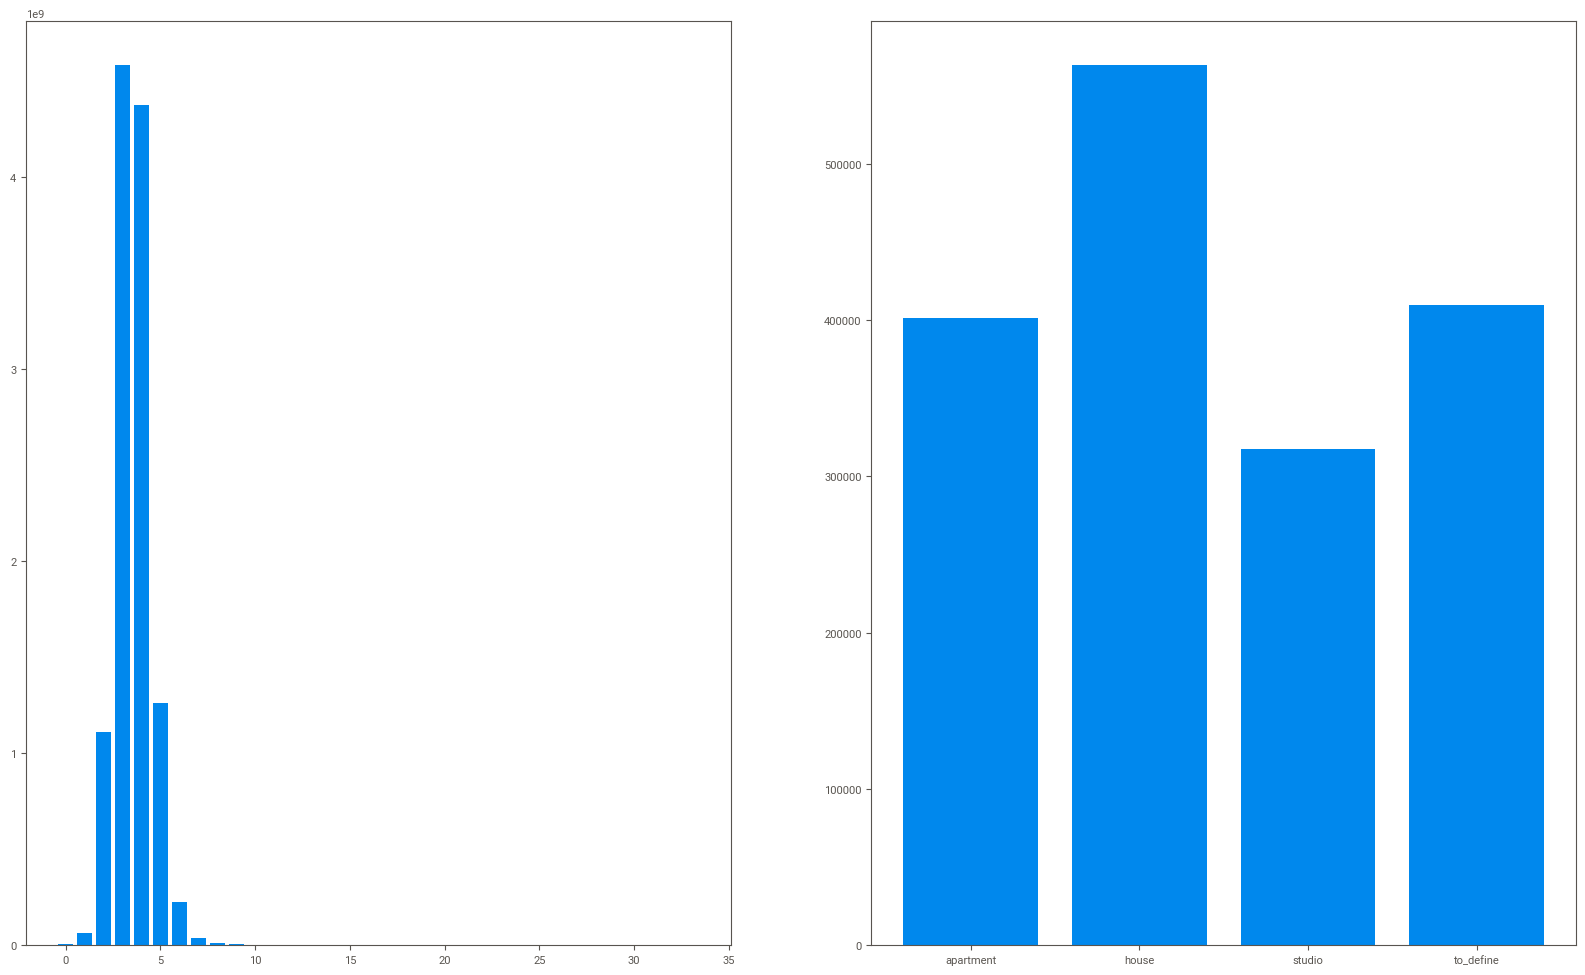

In [77]:

fig=plt.figure(figsize=(20,12))
specs= gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
ax4=fig.add_subplot(specs[:,0])#first col
ax5=fig.add_subplot(specs[:,1]) #second row- first column

ax4.bar(by_bedrooms['bedrooms'],by_bedrooms['price'])
ax5.bar(by_dormitory_type['dormitory_type'],by_dormitory_type['price'])


### 59. Create a dashboard with the charts from questions 53 and 55  
(Dashboard layout: 2 rows)

<BarContainer object of 4 artists>

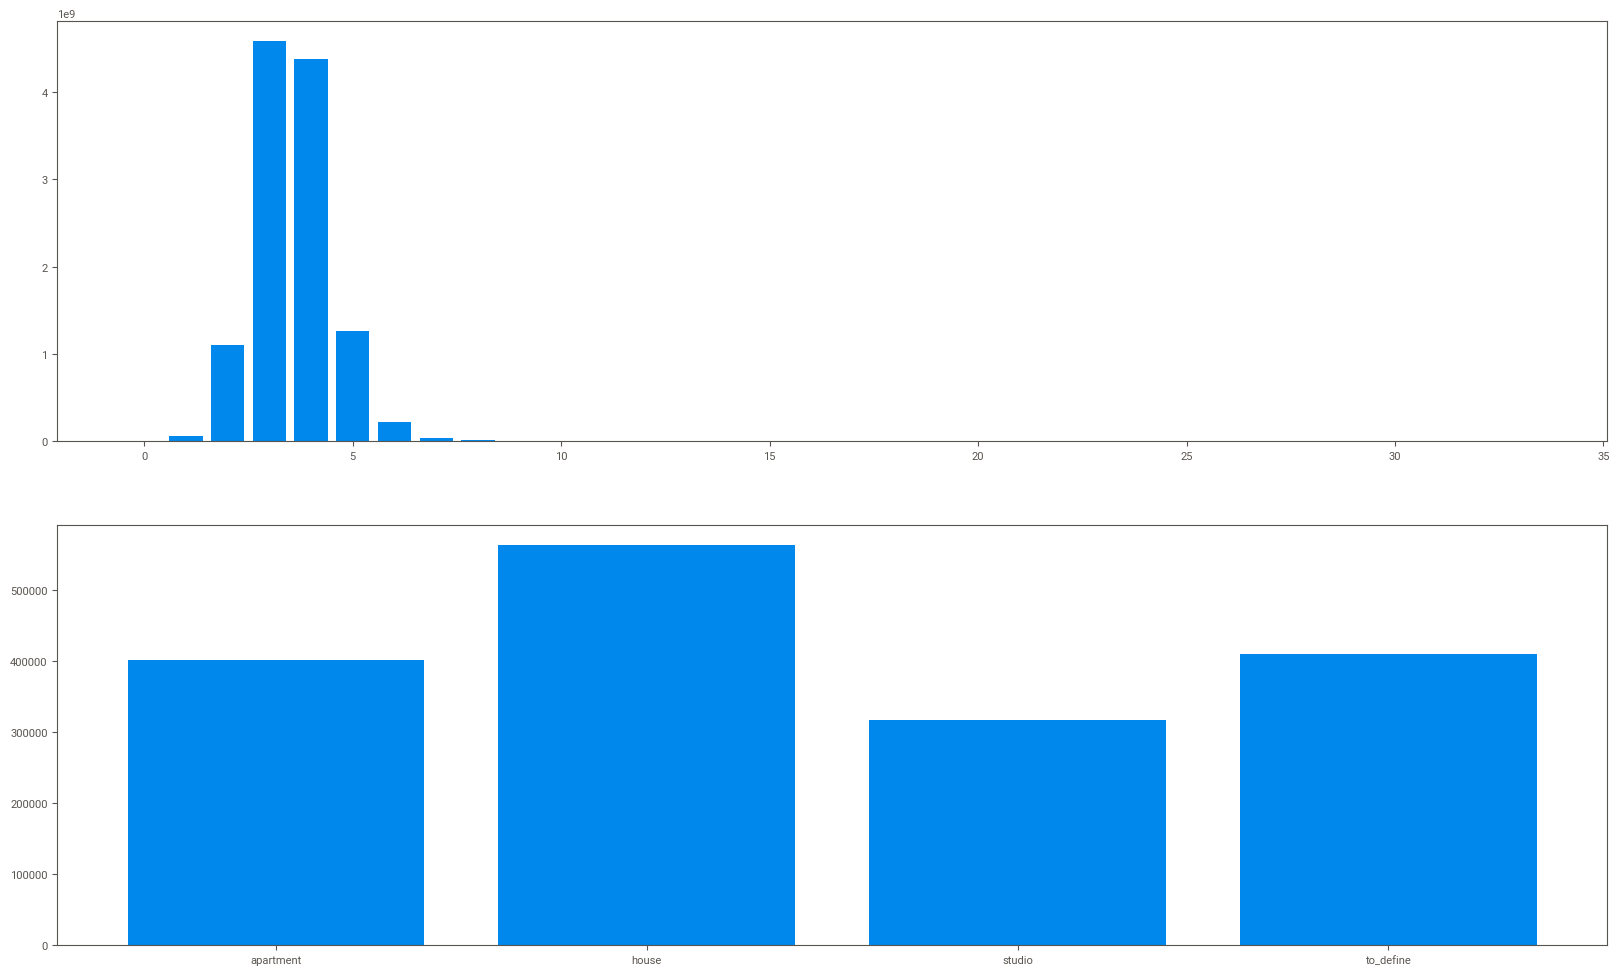

In [78]:
fig=plt.figure(figsize=(20,12))
specs= gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
ax4=fig.add_subplot(specs[0,:])#first col
ax5=fig.add_subplot(specs[1,:]) #second row- first column

ax4.bar(by_bedrooms['bedrooms'],by_bedrooms['price'])
ax5.bar(by_dormitory_type['dormitory_type'],by_dormitory_type['price'])

### 60. Create a chart where the point size represents the living room size.

In [79]:
house= data[['id','lat','long','sqft_living']]

fig= px.scatter_map( house,
                      lat='lat',
                      lon='long',
                      size ='sqft_living',
                      color_continuous_scale=px.colors.cyclical.IceFire,
                      size_max=15,
                      zoom=10)
fig.update_layout(mapbox_style ='open-street-map')
fig.update_layout(height=600,margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

### 61. What is the number of properties by level?

- Level 0: Price between R$ 0.00 and R$ 321,950  
- Level 1: Price between R$ 321,950 and R$ 450,000  
- Level 2: Price between R$ 450,000 and R$ 645,000  
- Level 3: Price above R$ 645,000  

Populate a new column called `level` based on the defined price ranges.

In [80]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'level', 'house_age', 'dormitory_type', 'condition_type',
       'year', 'day', 'year_week'],
      dtype='object')

In [81]:
#First option
data['property_level'] = 'NA'
data.loc[(data['price'] >= 0) & (data['price'] < 321950), 'property_level'] = 'property_level_0'
data.loc[(data['price'] >= 321950) & (data['price'] < 450000), 'property_level'] = 'property_level_1'
data.loc[(data['price'] >= 450000) & (data['price'] < 645000), 'property_level'] = 'property_level_2'
data.loc[(data['price'] >= 645000), 'property_level'] = 'property_level_3'
data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...   lat    long       level  \
0      5650    1.00           0     0  ... 47.51 -122.26   low_level   
1      7242    2.00           0     0  ... 47.72 -122.32   low_level   
2     10000    1.00           0     0  ... 47.74 -122.23   low_level   
3      5000    1.00           0     0  ... 47.52 -122.39  high_level   
4      8080    1.00           0     0  ... 47.62 -122.05   low_level   

   house_age dormitory_type  condition_type  year        day  year_week  \
0  new_house          house         regular  2014 2014-10-13    2014-41   
1  new_house          house         regular  2014 2014-12-09    2014-49   
2  new_house      apartment         regular  2015 2015-02-25    2015-08   
3  new_house          house            good  2014 2014-12-09    2014-49   
4  new_house          house         regular  2015 2015-02-18    2015-07   

     property_level  
0  property_level_0  
1  property_level_2  
2  property_level_0  
3  property_level_2  
4  property_level_2  

[5 rows x 27 columns]

In [82]:
#LOOP IF ELSE e FOR (Second option)
data['property_level'] = 'NA'
for i in range(len(data)):
    if (data.loc[i,'price'] > 0) & (data.loc[i,'price'] < 321950):
        data.loc[i,'property_level'] = 'property_level_0'
    elif (data.loc[i,'price'] > 321950) & (data.loc[i,'price'] < 450000):
        data.loc[i,'property_level'] = 'property_level_1'
    elif (data.loc[i,'price'] > 450000) & (data.loc[i,'price'] < 645000):
        data.loc[i,'property_level'] = 'property_level_2'    
    else:
        data.loc[i,'property_level'] = 'property_level_3'
data.head()        

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...   lat    long       level  \
0      5650    1.00           0     0  ... 47.51 -122.26   low_level   
1      7242    2.00           0     0  ... 47.72 -122.32   low_level   
2     10000    1.00           0     0  ... 47.74 -122.23   low_level   
3      5000    1.00           0     0  ... 47.52 -122.39  high_level   
4      8080    1.00           0     0  ... 47.62 -122.05   low_level   

   house_age dormitory_type  condition_type  year        day  year_week  \
0  new_house          house         regular  2014 2014-10-13    2014-41   
1  new_house          house         regular  2014 2014-12-09    2014-49   
2  new_house      apartment         regular  2015 2015-02-25    2015-08   
3  new_house          house            good  2014 2014-12-09    2014-49   
4  new_house          house         regular  2015 2015-02-18    2015-07   

     property_level  
0  property_level_0  
1  property_level_2  
2  property_level_0  
3  property_level_2  
4  property_level_2  

[5 rows x 27 columns]

### 62. Add the following information to each property:

- Street name  
- House number  
- Neighborhood name  
- City name  
- State name  

In [83]:
#initialize Nominatim API
geolocator=Nominatim(user_agent='geoAPI')#pode ser dado qualquer nome

In [84]:
#Test API response
response=geolocator.reverse('47.5112,-122.257')
response.raw

{'place_id': 299735402,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673596,
 'lat': '47.5112582',
 'lon': '-122.2573593',
 'class': 'building',
 'type': 'house',
 'place_rank': 30,
 'importance': 7.72983901731444e-05,
 'addresstype': 'building',
 'name': '',
 'display_name': '10011, 61st Avenue South, Rainier Beach, Tamill, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10011',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'ISO3166-2-lvl4': 'US-WA',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.5112110', '47.5113089', '-122.2574505', '-122.2572671']}

In [85]:
'''
#Warning: Too long to execute (~6h)
#create empty rows
data['road'] ='NA'
data['house_number'] ='NA'
data['neighbourhood'] ='NA'
data['city'] ='NA'
data['county'] ='NA'
data['state'] ='NA'


geolocator=Nominatim(user_agent='geoapiAPI')
for i in range(len(data)):
    query = str(data.loc[i,'lat']) + ',' + str(data.loc[i,'long'])
    #API request
    #print('Loop:{}/{}'.format(i,len(data)))
    response=geolocator.reverse(query)
    #populate data
    #o if é caso tiver o dado populado, caso contrario passa. Se não tiver isso ao não encontrar um dado da erro
    if 'house_number' in response.raw['address']:
        data.loc[i,'house_number'] =response.raw['address']['house_number']
    if 'road' in response.raw['address']:    
        data.loc[i,'road']         =response.raw['address']['road']
    if 'neighbourhood' in response.raw['address']:       
        data.loc[i,'neighbourhood']=response.raw['address']['neighbourhood']
    if 'city' in response.raw['address']:      
        data.loc[i,'city']         =response.raw['address']['city']
    if 'county' in response.raw['address']:     
        data.loc[i,'county']       =response.raw['address']['county']
    if 'state' in response.raw['address']:
        data.loc[i,'state']        =response.raw['address']['state']
'''

"\n#Warning: Too long to execute (~6h)\n#create empty rows\ndata['road'] ='NA'\ndata['house_number'] ='NA'\ndata['neighbourhood'] ='NA'\ndata['city'] ='NA'\ndata['county'] ='NA'\ndata['state'] ='NA'\n\n\ngeolocator=Nominatim(user_agent='geoapiAPI')\nfor i in range(len(data)):\n    query = str(data.loc[i,'lat']) + ',' + str(data.loc[i,'long'])\n    #API request\n    #print('Loop:{}/{}'.format(i,len(data)))\n    response=geolocator.reverse(query)\n    #populate data\n    #o if é caso tiver o dado populado, caso contrario passa. Se não tiver isso ao não encontrar um dado da erro\n    if 'house_number' in response.raw['address']:\n        data.loc[i,'house_number'] =response.raw['address']['house_number']\n    if 'road' in response.raw['address']:    \n        data.loc[i,'road']         =response.raw['address']['road']\n    if 'neighbourhood' in response.raw['address']:       \n        data.loc[i,'neighbourhood']=response.raw['address']['neighbourhood']\n    if 'city' in response.raw['addr

In [86]:
'''
data.head()
report= data.copy()
# salving as .csv
report.to_csv('datasets/kc_house_data_address_updated.csv', index=False) #index false reseta o indice
'''

"\ndata.head()\nreport= data.copy()\n# salving as .csv\nreport.to_csv('datasets/kc_house_data_address_updated.csv', index=False) #index false reseta o indice\n"

### 63. Create an interactive dashboard to select a range of available property by date

In [87]:
#prepare dataset
data=pd.read_csv('datasets/kc_house_data.csv')

#change date format to string 
data['year'] =pd.to_datetime(data['date']).dt.strftime('%Y')
data['date'] =pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data['year_week'] =pd.to_datetime(data['date']).dt.strftime('%Y-%U')

#widgets to control data
date_limit = widgets.SelectionSlider(
    options=data['date'].sort_values().unique().tolist(),
    value = '2014-12-01',
    description='Available',
    continuous_update=False,
    orientation ='horizontal',
    readout=True)

def update_map (data,limit):
    #filter data
    df = data[data['date'] >=limit].copy()
    
    fig=plt.figure(figsize=(21,12))
    specs=gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
    ax1 = fig.add_subplot(specs[0,:]) #first rows
    ax2 = fig.add_subplot(specs[1,0]) #second row First column
    ax3 = fig.add_subplot(specs[1,1]) #second row second column

    by_year = df[['id','year']].groupby('year').sum().reset_index()
    ax1.bar(by_year['year'],by_year['id'])
    
    by_day = df[['id','date']].groupby('date').mean().reset_index()
    ax2.plot(by_day['date'],by_day['id'])
    ax2.set_title('title: Avg Price by Day')
    
    by_week_of_year = df[['id','year_week']].groupby('year_week').mean().reset_index()
    ax3.bar(by_week_of_year['year_week'],by_week_of_year['id'])
    ax3.set_title('title: Avg Price by week of year')
    plt.xticks(rotation=60);


In [88]:
widgets.interactive(update_map,data=fixed(data),limit=date_limit)

interactive(children=(SelectionSlider(continuous_update=False, description='Available', index=212, options=('2…

# Insights

# *Business Questions*

## Which properties should House Rocket buy and at what price ?

#### Solution Planning
Goal: Identify the best investment opportunities for House Rocket.

Strategy: * Group properties by region (ZIP code).

Calculate the mean price for each specific region.

Action: I will suggest buying properties that are below the mean price and in good condition.

Columns: Property ID |	Region |	Property Price |	Median Price | Condition | Status

In [89]:
df1 = data[['price','zipcode']].groupby('zipcode').mean().reset_index()
df1 = df1.rename(columns={'price': 'mean_price'})
df1.head()
m1 = pd.merge( data, df1, on='zipcode', how='inner' )
m1.head()
#SInce the condition is 1-5. I will recomend only the properties in  starting from good state(3),


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00         3       1.00         1180   
1  6414100192  2014-12-09 538000.00         3       2.25         2570   
2  5631500400  2015-02-25 180000.00         2       1.00          770   
3  2487200875  2014-12-09 604000.00         4       3.00         1960   
4  1954400510  2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650    1.00           0     0  ...      1955             0    98178   
1      7242    2.00           0     0  ...      1951          1991    98125   
2     10000    1.00           0     0  ...      1933             0    98028   
3      5000    1.00           0     0  ...      1965             0    98136   
4      8080    1.00           0     0  ...      1987             0    98074   

    lat    long  sqft_living15  sqft_lot15  year  year_week  mean_price  
0 47.51 -122.26           1340        5650  2014    2014-41   310612.76  
1 47.72 -122.32           1690        7639  2014    2014-49   469455.77  
2 47.74 -122.23           2720        8062  2015    2015-08   462480.04  
3 47.52 -122.39           1360        5000  2014    2014-49   551688.67  
4 47.62 -122.05           1800        7503  2015    2015-07   685605.78  

[5 rows x 24 columns]

In [90]:
df2 = m1.loc[m1['condition'] >=3]
df2['Status'] = 'NA'
df2.head()
#will use apply instead of map, because map does not work with multiple columns
df2['Status']= df2.apply(lambda x: 'Buy' if x['price'] < x['mean_price'] else 'Not Buy', axis=1)
df2.head()

/tmp/ipykernel_8807/2670773812.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8807/2670773812.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00         3       1.00         1180   
1  6414100192  2014-12-09 538000.00         3       2.25         2570   
2  5631500400  2015-02-25 180000.00         2       1.00          770   
3  2487200875  2014-12-09 604000.00         4       3.00         1960   
4  1954400510  2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode   lat  \
0      5650    1.00           0     0  ...             0    98178 47.51   
1      7242    2.00           0     0  ...          1991    98125 47.72   
2     10000    1.00           0     0  ...             0    98028 47.74   
3      5000    1.00           0     0  ...             0    98136 47.52   
4      8080    1.00           0     0  ...             0    98074 47.62   

     long  sqft_living15  sqft_lot15  year  year_week  mean_price   Status  
0 -122.26           1340        5650  2014    2014-41   310612.76      Buy  
1 -122.32           1690        7639  2014    2014-49   469455.77  Not Buy  
2 -122.23           2720        8062  2015    2015-08   462480.04      Buy  
3 -122.39           1360        5000  2014    2014-49   551688.67  Not Buy  
4 -122.05           1800        7503  2015    2015-07   685605.78      Buy  

[5 rows x 25 columns]

## Once the property is purchased, when would be the best time to sell it?

### When it would be the best time to sell?
Refined Strategy: I will analyze price seasonality at the regional level.

Reasoning: Real estate trends are local; therefore, the "best month to sell" may vary depending on the property's ZIP code.

Calculation: I will compute the mean price grouped by zipcode and month to ensure the sales strategy is tailored to each specific market.

In [92]:
df3= df2.copy()
df3['month'] = pd.to_datetime(df3['date']).dt.month
df3.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00         3       1.00         1180   
1  6414100192  2014-12-09 538000.00         3       2.25         2570   
2  5631500400  2015-02-25 180000.00         2       1.00          770   
3  2487200875  2014-12-09 604000.00         4       3.00         1960   
4  1954400510  2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode   lat    long  \
0      5650    1.00           0     0  ...    98178 47.51 -122.26   
1      7242    2.00           0     0  ...    98125 47.72 -122.32   
2     10000    1.00           0     0  ...    98028 47.74 -122.23   
3      5000    1.00           0     0  ...    98136 47.52 -122.39   
4      8080    1.00           0     0  ...    98074 47.62 -122.05   

   sqft_living15  sqft_lot15  year  year_week  mean_price   Status  month  
0           1340        5650  2014    2014-41   310612.76      Buy     10  
1           1690        7639  2014    2014-49   469455.77  Not Buy     12  
2           2720        8062  2015    2015-08   462480.04      Buy      2  
3           1360        5000  2014    2014-49   551688.67  Not Buy     12  
4           1800        7503  2015    2015-07   685605.78      Buy      2  

[5 rows x 26 columns]

In [98]:
df4 = df3[['month','zipcode','price']].groupby(['zipcode','month']).mean().reset_index()
df4_monthly_mean=df4.rename(columns={'price':'monthly_mean_price'})
df4_monthly_mean.head()

zipcode  month  monthly_mean_price
0    98001      1           278641.00
1    98001      2           296576.47
2    98001      3           268462.65
3    98001      4           329712.41
4    98001      5           253686.22

### **What a price to sell?**


* **Context:** Real estate prices fluctuate based on both location and time of year.
* **Strategy:** I compared the **Monthly Regional Mean** against the **Overall Regional Mean** to determine the markup.
* **Decision Rules:**
    1. If **Monthly Mean < Overall Regional Mean**: The market is in a "low" phase. I recommend a **30% markup** to maximize profit or account for the holding period.
    2. If **Monthly Mean >= Overall Regional Mean**: The market is in a "high" phase. I recommend a **10% markup** to ensure a quick sale while the market is favorable.

In [ ]:
#Merging dataframes
df_final = pd.merge(df3, df4_monthly_mean, on=['zipcode', 'month'], how='inner')
df_final.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00         3       1.00         1180   
1  6414100192  2014-12-09 538000.00         3       2.25         2570   
2  5631500400  2015-02-25 180000.00         2       1.00          770   
3  2487200875  2014-12-09 604000.00         4       3.00         1960   
4  1954400510  2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...   lat    long  sqft_living15  \
0      5650    1.00           0     0  ... 47.51 -122.26           1340   
1      7242    2.00           0     0  ... 47.72 -122.32           1690   
2     10000    1.00           0     0  ... 47.74 -122.23           2720   
3      5000    1.00           0     0  ... 47.52 -122.39           1360   
4      8080    1.00           0     0  ... 47.62 -122.05           1800   

   sqft_lot15  year  year_week  mean_price   Status  month  monthly_mean_price  
0        5650  2014    2014-41   310612.76      Buy     10           290297.41  
1        7639  2014    2014-49   469455.77  Not Buy     12           506628.12  
2        8062  2015    2015-08   462480.04      Buy      2           423835.71  
3        5000  2014    2014-49   551688.67  Not Buy     12           515844.12  
4        7503  2015    2015-07   685605.78      Buy      2           642096.67  

[5 rows x 27 columns]

In [100]:
#drop  registres with Status not buy values
df_final = df_final[df_final['Status']=='Buy']
df_final.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00         3       1.00         1180   
2  5631500400  2015-02-25 180000.00         2       1.00          770   
4  1954400510  2015-02-18 510000.00         3       2.00         1680   
6  1321400060  2014-06-27 257500.00         3       2.25         1715   
7  2008000270  2015-01-15 291850.00         3       1.50         1060   

   sqft_lot  floors  waterfront  view  ...   lat    long  sqft_living15  \
0      5650    1.00           0     0  ... 47.51 -122.26           1340   
2     10000    1.00           0     0  ... 47.74 -122.23           2720   
4      8080    1.00           0     0  ... 47.62 -122.05           1800   
6      6819    2.00           0     0  ... 47.31 -122.33           2238   
7      9711    1.00           0     0  ... 47.41 -122.31           1650   

   sqft_lot15  year  year_week  mean_price  Status  month  monthly_mean_price  
0        5650  2014    2014-41   310612.76     Buy     10           290297.41  
2        8062  2015    2015-08   462480.04     Buy      2           423835.71  
4        7503  2015    2015-07   685605.78     Buy      2           642096.67  
6        6819  2014    2014-25   294111.28     Buy      6           295044.74  
7        9711  2015    2015-02   302878.88     Buy      1           318146.88  

[5 rows x 27 columns]

In [102]:
df_final['Suggested_Price']= df_final.apply(lambda x: x['price']*1.30 if x['monthly_mean_price'] < x['mean_price'] else x['price']*1.10, axis=1)
df_final.head()


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00         3       1.00         1180   
2  5631500400  2015-02-25 180000.00         2       1.00          770   
4  1954400510  2015-02-18 510000.00         3       2.00         1680   
6  1321400060  2014-06-27 257500.00         3       2.25         1715   
7  2008000270  2015-01-15 291850.00         3       1.50         1060   

   sqft_lot  floors  waterfront  view  ...    long  sqft_living15  sqft_lot15  \
0      5650    1.00           0     0  ... -122.26           1340        5650   
2     10000    1.00           0     0  ... -122.23           2720        8062   
4      8080    1.00           0     0  ... -122.05           1800        7503   
6      6819    2.00           0     0  ... -122.33           2238        6819   
7      9711    1.00           0     0  ... -122.31           1650        9711   

   year  year_week  mean_price  Status  month  monthly_mean_price  \
0  2014    2014-41   310612.76     Buy     10           290297.41   
2  2015    2015-08   462480.04     Buy      2           423835.71   
4  2015    2015-07   685605.78     Buy      2           642096.67   
6  2014    2014-25   294111.28     Buy      6           295044.74   
7  2015    2015-02   302878.88     Buy      1           318146.88   

   Suggested_Price  
0        288470.00  
2        234000.00  
4        663000.00  
6        283250.00  
7        321035.00  

[5 rows x 28 columns]

### Calculation of profit

In [105]:
df_final['Profit']= df_final.apply(lambda x: x['Suggested_Price'] - x['price'], axis=1)
df_final.head()
print('The Total amount of expected profit is {:.2f}'.format(df_final['Profit'].sum()))


The Total amount of expected profit is 1121790262.50


In [106]:
#Top 30 most profitable houses
df_top30= df_final.sort_values('Profit', ascending=False).head(30)
df_top30[['id','price','Suggested_Price','Profit']] 

id      price  Suggested_Price    Profit
19154  2525049113 1950000.00       2535000.00 585000.00
14109  2425049107 1950000.00       2535000.00 585000.00
18719  2425049066 1920000.00       2496000.00 576000.00
3727   2540700110 1905000.00       2476500.00 571500.00
5531   6447300225 1880000.00       2444000.00 564000.00
21312  3262300818 1865000.00       2424500.00 559500.00
12174  3738000070 1712750.00       2226575.00 513825.00
13097  3262300322 1651000.00       2146300.00 495300.00
6799   3262300235 1555000.00       2021500.00 466500.00
18699  5427100150 1410000.00       1833000.00 423000.00
7429   2525049133 1398000.00       1817400.00 419400.00
3990   8964800930 1350000.00       1755000.00 405000.00
8163   3262301355 1320000.00       1716000.00 396000.00
18417  9533600100 1315000.00       1709500.00 394500.00
16024  1925059073 1300000.00       1690000.00 390000.00
421    9808650060 1300000.00       1690000.00 390000.00
15060  1651800010 1300000.00       1690000.00 390000.00
7590   8085400355 1270000.00       1651000.00 381000.00
19771   711000110 1266520.00       1646476.00 379956.00
7259   2450000290 1245000.00       1618500.00 373500.00
13844  5427110040 1225000.00       1592500.00 367500.00
16278  4340000010 1220000.00       1586000.00 366000.00
8460   9808700650 1208000.00       1570400.00 362400.00
16215  3262300920 1200000.00       1560000.00 360000.00
5826   9808590460 1200000.00       1560000.00 360000.00
4133   4122500100 1191000.00       1548300.00 357300.00
11481   629000510 1185000.00       1540500.00 355500.00
11363  2524049250 1180000.00       1534000.00 354000.00
7389   5451200280 1170000.00       1521000.00 351000.00
14569  1922000180 1160000.00       1508000.00 348000.00